<div class="alert alert-success" style="color: #333; background-color: #fff5fd; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 10px;">

<a id="contents"></a>
    
# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC209b Final Project - Sentiment Analysis for Tinder Review 

### Group 46: Chuqing Zhao, Haitian Liu, Ruqi Liao, Siyao Li, Zhe (Gigi) Fang


## [*PART 1: Motivation & Problem Statement*](#part1)

## [*PART 2: Data Overview & Processing*](#part2)

## [*PART 3: Exploratory Data Analysis (EDA)*](#part3)

## [*PART 4: Modeling Approach & Results*](#part4)

## [*PART 5: Conclusion*](#part5)

## [*PART 6: Strength, Limitation & Future work*](#part6)

## [*References*](#part7)

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

The libraries that our codes depend on include emoji for transforming emojis in users' reviews into text, wordcloud for visualizing word frequency, spacy and nltk for removing stop words while cleaning data, transformer for building attention based models, tensorflow for building neural network, sklearn for implementing performance metrics for models, numpy and pandas for performing data preprocessing, torch for saving tensors, matplotlib and seaborn for result plotting model results, tqdm for progressing bar, re and ast for tokenization, and scipy for mathematical computations.

In [1]:
# Requirement
! pip install emoji
! pip install wordcloud
! pip install -U pip setuptools wheel
! pip install -U spacy
! pip install transformers
! pip install tensorflow-text
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=1ae0a29703b9f204f33d34bf06f95691ba753e476d06496e1d0d8bfd05c068aa
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

import re
import nltk
from nltk import word_tokenize, tokenize
import string
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import tqdm
import os
import locale
locale.getpreferredencoding = lambda: "UTF-8"
import wordcloud
from wordcloud import WordCloud

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import scipy
import ast
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding,SimpleRNN, Bidirectional, Dropout, GRU
from keras.layers import Input, GlobalAveragePooling1D, Embedding, LayerNormalization, MultiHeadAttention
from keras.models import Model

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.python.keras import backend as K

import torch

In [3]:
# download datasets from google drive
!gdown "https://drive.google.com/uc?id=1wHJui7NMXDGKvrJ5ofVrvJYQTeYIkcVO"
!gdown "https://drive.google.com/uc?id=1VbNCVJGJayqcn6ZJCxyRCGA22C_ZEto6" 
!gdown "https://drive.google.com/uc?id=1M6HkH3QHMGKg_4D0Xnd1VeRO7U07kV3E"
!ls -l 

Downloading...
From: https://drive.google.com/uc?id=1wHJui7NMXDGKvrJ5ofVrvJYQTeYIkcVO
To: /content/tinder_google_play_reviews.csv
100% 170M/170M [00:01<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VbNCVJGJayqcn6ZJCxyRCGA22C_ZEto6
To: /content/positive_words.txt
100% 21.1k/21.1k [00:00<00:00, 78.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M6HkH3QHMGKg_4D0Xnd1VeRO7U07kV3E
To: /content/negative_words.txt
100% 49.5k/49.5k [00:00<00:00, 118MB/s]
total 166116
-rw-r--r-- 1 root root     49539 May  7 19:22 negative_words.txt
-rw-r--r-- 1 root root     21097 May  7 19:22 positive_words.txt
drwxr-xr-x 1 root root      4096 May  3 13:31 sample_data
-rw-r--r-- 1 root root 170016921 May  7 19:22 tinder_google_play_reviews.csv


<div class="alert alert-success" style="color: #333; background-color: #e6efff; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 30px;">

<a id="part1"></a>
    
# 1) Motivation & Problem Statement

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

In the era of flourishing, new sci-tech revolution, dating apps have become increasingly popular and have revolutionized the way people connect and form relationships. It becomes crucial for developers and operators to understand the sentiments and opinions of their users, which is useful for providing customer insights, managing the reputation of the application, enhancing product improvement, and informing and refining marketing strategies. 

Natural Language Processing (NLP) is a field of study that focuses on enabling computers to understand, interpret, and generate human language. NLP algorithms and models are designed to handle various linguistic aspects of human language, such as grammar, syntax, semantics, pragmatics, and discourse. Sentiment analysis is a subfield of NLP that involves extracting and analyzing subjective information from text data to determine the sentiment or emotional tone expressed in a piece of text, whether it is positive, negative, or neutral, towards a specific subject, such as a product, service, brand, or event. It typically uses machine learning, statistical modeling, and linguistic techniques to automatically classify and analyze the sentiment conveyed in textual data.

In this project, we aim to perform a sentiment analysis on the Tinder app reviews obtained from the Google Play Store - determining whether the attitude expressed in a text of review is positive or negative. Toward this goal, we leveraged data science and NLP techniques such as tokenization and word embeddings, and trained sentiment classification algorithms to automatically analyze and classify user sentiments expressed in their reviews. 


<div class="alert alert-success" style="color: #333; background-color: #e6efff; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 30px;">

<a id="part2"></a>
    
# 2) Data Overview & Processing

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 2.1 Import Data

The dataset we used is drawn from Kaggle, which belongs to the app Tinder available on the Google Play Store. This dataset recorded 579,364 reviews from the Tinder app and had 10 columns. Our sentiment analysis model intended to use the column ‘content’ as the predictor. 

We used pandas' "read_csv" method to import Tinder review. Data is downloaded from: https://www.kaggle.com/datasets/shivkumarganesh/tinder-google-play-store-review

The content of the various columns is listed below. Please find the description for each column.

| Column Name      | Column Description                                  |
|------------------|----------------------------------------------------|
| userName         | Name of a User                                      |
| userImage        | Profile Image that a user has                       |
| content          | This represents the comments made by a user        |
| score            | Scores/Rating between 1 to 5                        |
| thumbsUpCount    | Number of Thumbs up received by a person            |
| reviewCreatedVersion | Version number on which the review is created    |
| at               | Created At                                          |
| replyContent     | Reply to the comment by the Company                 |
| repliedAt        | Date and time of the above reply                     |
| reviewId         | unique identifier                                    |


In [4]:
# Read raw data
df_raw = pd.read_csv("tinder_google_play_reviews.csv")
print(f"Original Dataframe shape is {df_raw.shape}")
df_raw.head()

Original Dataframe shape is (579364, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,db9b1a26-a9c0-4cf4-968e-36f5533c74a6,Paul Butler,https://play-lh.googleusercontent.com/a-/ACB-R...,"It's a bit pricey, but they have sales. It sti...",2,0,14.5.0,2023-03-24 00:55:46,NaN,NaN
1,0c6285a0-6af7-481e-b96c-d1b7c8c7ccf5,Kenneth Ng,https://play-lh.googleusercontent.com/a-/ACB-R...,Not as fun as you think. You need to pay to se...,1,0,14.4.2,2023-03-24 00:54:14,NaN,NaN
2,1ea3366b-bb07-467b-a796-36d082fb430c,Stoke,https://play-lh.googleusercontent.com/a-/ACB-R...,hated it!,1,0,14.4.2,2023-03-24 00:53:53,NaN,NaN
3,2542b216-f592-41a7-a852-f6cc144dffc1,Clay Wood,https://play-lh.googleusercontent.com/a/AGNmyx...,I thought this app was for hookups? half the g...,2,0,14.4.2,2023-03-24 00:49:45,NaN,NaN
4,2aadea08-8d2f-4cf0-b9ed-65c94101e9dd,Matt K,https://play-lh.googleusercontent.com/a-/ACB-R...,What a joke. I've had this app for almost two ...,2,0,NaN,2023-03-24 00:48:43,NaN,NaN


In [5]:
# Browse dataframe 
df_raw.describe().T.style.background_gradient(cmap='viridis',low =0.1,high=0.1) 

,count,mean,std,min,25%,50%,75%,max
score,579364.000000,2.940737,1.766915,0.000000,1.000000,3.000000,5.000000,5.000000
thumbsUpCount,579364.000000,1.781778,29.560968,0.000000,0.000000,0.000000,0.000000,5487.000000


In [6]:
# Display raw data information
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579364 entries, 0 to 579363
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              579364 non-null  object
 1   userName              579360 non-null  object
 2   userImage             579364 non-null  object
 3   content               578026 non-null  object
 4   score                 579364 non-null  int64 
 5   thumbsUpCount         579364 non-null  int64 
 6   reviewCreatedVersion  459472 non-null  object
 7   at                    579364 non-null  object
 8   replyContent          47168 non-null   object
 9   repliedAt             47168 non-null   object
dtypes: int64(2), object(8)
memory usage: 44.2+ MB


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 2.2 Clean Data

### Missingness 
Since the missing data in the column ‘content’ are text of Tinder users’ comments that cannot be imputed and the amount of missing data is small, we decided to exclude the rows with missing ‘content’ (n=1,338).


In [7]:
# Count missing values for each column
missing_values = df_raw.isnull().sum()
missing_values_df = pd.DataFrame(missing_values, columns=["count_missing"]).reset_index().rename(columns={"index": "column_name"})
missing_values_df["proportion_missing"] = (df_raw.isnull().mean().values * 100).round(6)  # percentage scalar
missing_values_df.style.background_gradient(cmap='viridis',low =0.1,high=0.1) 

,column_name,count_missing,proportion_missing
0,reviewId,0,0.000000
1,userName,4,0.000690
2,userImage,0,0.000000
3,content,1338,0.230943
4,score,0,0.000000
5,thumbsUpCount,0,0.000000
6,reviewCreatedVersion,119892,20.693726
7,at,0,0.000000
8,replyContent,532196,91.858659
9,repliedAt,532196,91.858659


In [8]:
# Drop the rows with missing values from a specific column 'content', store the resulting DataFrame in the 'df' variable.
df = df_raw.dropna(subset=['content'])
print(f"After drop NA values in 'content', Dataframe shape is {df.shape}")
df.isnull().sum()   # count missing values for 'df' DataFrame

After drop NA values in 'content', Dataframe shape is (578026, 10)


reviewId                     0
userName                     4
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion    119818
at                           0
replyContent            531104
repliedAt               531104
dtype: int64

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### Imbalance
    
The response variable ‘score’ is imbalanced in the raw dataset. To address imbalance, we recorded this variable by combining 1,2 into one category ‘negative’, combining 4,5 into one category ‘positive’, and leaving 3 as category ‘neutral’. Because the single response ‘0’ is very likely to be generated because of accidental error, we excluded this observation (n=1) Neutral data can make it more difficult to classify sentiment accurately, which possibly leads to reduced accuracy in the sentiment analysis task. In our case, we dropped the ‘neutral’ data (n=45,007).

In [9]:
# Count number of unique values in "score" column
df["score"].value_counts()

1    227969
5    196718
4     67486
3     45007
2     40845
0         1
Name: score, dtype: int64

In [10]:
# Classify into 'negative', 'neutral' and 'positive' 
df2 = df.copy()
df2 = df2.loc[df2['score'] != 0]  #drop score equal to 0
# label score 3 as 'neutral', score 1 or 2 as 'negative', score 4 or 5 as "postive"
df2['score'] = df2['score'].replace({3:'neutral', 1:'negative', 2:'negative', 4:'positive', 5:'positive'}) 
df2.score.value_counts()

negative    268814
positive    264204
neutral      45007
Name: score, dtype: int64

In [11]:
# display first 5 neutral content
with pd.option_context('display.max_colwidth', None):
    display(df2[df2['score']=='neutral']["content"][:5])

16                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Not a good app.
27                                                                                                                                                                                                                                                                                                                                                                                                                                                                     It's ok not bad but gotta pay
33                            

In [12]:
# display first 5 positive content
with pd.option_context('display.max_colwidth', None):
    display(df2[df2['score']=='positive']["content"][:5])

7                                                                  Good meet new friends
10       great site but lots of fake profiles and bots work around that and you are safe
11                                                                             Very nice
15    site works well, unfortunately there isn't a free option. overall would recommend.
21                                                                                   Bad
Name: content, dtype: object

In [13]:
# display first 5 negative content, we noticed in some of the content have emoji inside
with pd.option_context('display.max_colwidth', None):
    display(df2[df2['score']=='negative']["content"][:5])

0                                                       It's a bit pricey, but they have sales. It still works even if you don't pay, so it doesn't really matter. Negative I've found is the app ask you to verify email every 5 minutes.
1                                                                                   Not as fun as you think. You need to pay to see who likes you and reply them to start a chat. I pay for one month and find out most of it fake people.
2                                                                                                                                                                                                                                hated it!
3                                                                                                                                  I thought this app was for hookups? half the girls on here are fake. I have far more luck in real life🤷
4    What a joke. I've had this app for almost two years and

In [14]:
# check columns with the emoji 
print(df2.iloc[1430]['content'])

😍


In [15]:
# Count number of thumbs up count for positive review
df2[df2['score'] == 'positive'].thumbsUpCount.value_counts()

0      250743
1        8586
2        1672
3         776
4         425
        ...  
189         1
244         1
166         1
75          1
263         1
Name: thumbsUpCount, Length: 256, dtype: int64

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 2.3 Emoji representation

When preprocessing the Tinder review, we found emoji is also an important part of users’ emotional expression. To address the issue of emoji token representation, we applied the AutoTokenizer from HuggingFace transformers package and emoji package, which translates an emoji to a text description. For example, 👍 is translated to ‘thumbs up’ and 😍 is translated to ‘smiling face with heart-eyes’. 

In [16]:
# Tranform emoji into text
def emoji2description(text):
    """Translate the emoji into text"""
    return emoji.replace_emoji(text, replace=lambda chars, data_dict: ' '.join(data_dict['en'].split('_')).strip(':'))

In [17]:
emoji2description('😓') # test whether emoji can be converted to text

'downcast face with sweat'

In [18]:
# add a column named "content_emoji", representation emoji to text
df2['content_emoji'] = df2['content'].apply(lambda x: emoji2description(x))

In [19]:
# check emoji representation successful or not
df2[['content_emoji','content']].iloc[[22,123,1430],]

,content_emoji,content
22,very good smiling face with smiling eyes app,very good 😊 app
123,good thumbs up,good 👍
1430,smiling face with heart-eyes,😍


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 2.4 Preprocess texts

Since the original texts contains punctuations and non-English text that cannot be understood by natural language models, we applied the following steps to clean the text data into same unit: first, we removed punctuation by using regular expressions; second, we broke down the strings to words and convert to lowercase; third, we removed the stop words that do not add much information to the text using dictionary from NLTK package; finally, we tokenized texts by NLTK tokenizer.

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
nltk.download('stopwords') #download stopwords 
nltk.download('wordnet') #download word net
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')
stop += stopwords.words('english')
stop_new = [i for i in stop if i!='not' and i!='no']

def tokenize_clean(text):
    split_string = re.findall(r"(\d+|\D+)", text) # find digits
    clean_text = " ".join(split_string) #split by empty space 
    pattern = re.compile(r'[a-zA-Z0-9]+') # keep digits and english texts in string 
    sentence  = pattern.findall(clean_text.lower()) #convert the lower case
    lemm_text = [txt for txt in sentence if txt not in stop_new and len(txt)<20] #remove stop words
    return lemm_text if len(lemm_text) != 0 else np.nan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
# apply our tokenize to a new column "token_content"
df2['token_content'] = df2['content_emoji'].apply(lambda x: tokenize_clean(x))
df2['token_content']

0         [bit, pricey, sales, still, works, even, pay, ...
1         [not, fun, think, need, pay, see, likes, reply...
2                                                   [hated]
3         [thought, app, hookups, half, girls, fake, far...
4         [joke, app, almost, two, years, randomly, bann...
                                ...                        
579359                  [best, app, ever, finally, android]
579360    [tinder, extremely, buggy, galaxy, 4, active, ...
579361                                    [keeps, crashing]
579362           [crashes, load, total, failure, take, fix]
579363                     [finally, real, tinder, android]
Name: token_content, Length: 578025, dtype: object

In [23]:
# display fist 10 content, content_emoji, and token_content
with pd.option_context('display.max_rows', None,
                      'display.max_colwidth', None):
    display(df2[:10][["content","content_emoji", "token_content"]])

,content,content_emoji,token_content
0,"It's a bit pricey, but they have sales. It still works even if you don't pay, so it doesn't really matter. Negative I've found is the app ask you to verify email every 5 minutes.","It's a bit pricey, but they have sales. It still works even if you don't pay, so it doesn't really matter. Negative I've found is the app ask you to verify email every 5 minutes.","[bit, pricey, sales, still, works, even, pay, really, matter, negative, found, app, ask, verify, email, every, 5, minutes]"
1,Not as fun as you think. You need to pay to see who likes you and reply them to start a chat. I pay for one month and find out most of it fake people.,Not as fun as you think. You need to pay to see who likes you and reply them to start a chat. I pay for one month and find out most of it fake people.,"[not, fun, think, need, pay, see, likes, reply, start, chat, pay, one, month, find, fake, people]"
2,hated it!,hated it!,[hated]
3,I thought this app was for hookups? half the girls on here are fake. I have far more luck in real life🤷,I thought this app was for hookups? half the girls on here are fake. I have far more luck in real lifeperson shrugging,"[thought, app, hookups, half, girls, fake, far, luck, real, lifeperson, shrugging]"
4,What a joke. I've had this app for almost two years and now I'm randomly banned after submitting a verification photo? Are you kidding me? The messaging function is a joke. I hope a better app gets made and you go out of business,What a joke. I've had this app for almost two years and now I'm randomly banned after submitting a verification photo? Are you kidding me? The messaging function is a joke. I hope a better app gets made and you go out of business,"[joke, app, almost, two, years, randomly, banned, submitting, verification, photo, kidding, messaging, function, joke, hope, better, app, gets, made, go, business]"
5,"Got auto banned for some reason I hopped back on after taking a break and got banned the next day even though I only had two very tame pics, no bio, and I hadn't sent any likes yet.","Got auto banned for some reason I hopped back on after taking a break and got banned the next day even though I only had two very tame pics, no bio, and I hadn't sent any likes yet.","[got, auto, banned, reason, hopped, back, taking, break, got, banned, next, day, even, though, two, tame, pics, no, bio, sent, likes, yet]"
6,"This App has ALOT OF FAKE PROFILES. Don't get scam buying Premiun versioms, mot worth it","This App has ALOT OF FAKE PROFILES. Don't get scam buying Premiun versioms, mot worth it","[app, alot, fake, profiles, get, scam, buying, premiun, versioms, mot, worth]"
7,Good meet new friends,Good meet new friends,"[good, meet, new, friends]"
8,Worst,Worst,[worst]
9,"This app sucks, I got banned for no reason at all.","This app sucks, I got banned for no reason at all.","[app, sucks, got, banned, no, reason]"


In [24]:
# display the special case
with pd.option_context('display.max_colwidth', None):
    display(df2[df2['reviewId'] == 'e20ae65c-cd4d-4778-a4f9-7207f91e7055'][["content","content_emoji", "token_content"]])

,content,content_emoji,token_content
662,Одна реклама,Одна реклама,NaN


In [25]:
# track the Na's in token_content column
df2.isna().sum()

reviewId                     0
userName                     4
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion    119818
at                           0
replyContent            531103
repliedAt               531103
content_emoji                0
token_content             2878
dtype: int64

In [26]:
# Recode responses variable
df_emoji = df2.copy()
df_emoji['score'].replace('negative',0, inplace=True)
df_emoji['score'].replace('positive',1, inplace=True)
df_emoji = df_emoji[df_emoji['score']!='neutral']
df_emoji.to_csv(r'transfer_emoji.csv')

In [27]:
# drop NA's in column 'token_content'
df2.dropna(subset=['token_content'], inplace=True)
df2['word_count'] = df2['token_content'].apply(lambda x: len(x))
print(f"After drop NA values in 'token_content', Dataframe shape is {df2.shape}")
df2.isnull().sum() # count missing values for 'df3' DataFrame

After drop NA values in 'token_content', Dataframe shape is (575147, 13)


reviewId                     0
userName                     4
userImage                    0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion    119209
at                           0
replyContent            528346
repliedAt               528346
content_emoji                0
token_content                0
word_count                   0
dtype: int64

In [28]:
# browse dataframe
df2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,content_emoji,token_content,word_count
0,db9b1a26-a9c0-4cf4-968e-36f5533c74a6,Paul Butler,https://play-lh.googleusercontent.com/a-/ACB-R...,"It's a bit pricey, but they have sales. It sti...",negative,0,14.5.0,2023-03-24 00:55:46,NaN,NaN,"It's a bit pricey, but they have sales. It sti...","[bit, pricey, sales, still, works, even, pay, ...",18
1,0c6285a0-6af7-481e-b96c-d1b7c8c7ccf5,Kenneth Ng,https://play-lh.googleusercontent.com/a-/ACB-R...,Not as fun as you think. You need to pay to se...,negative,0,14.4.2,2023-03-24 00:54:14,NaN,NaN,Not as fun as you think. You need to pay to se...,"[not, fun, think, need, pay, see, likes, reply...",16
2,1ea3366b-bb07-467b-a796-36d082fb430c,Stoke,https://play-lh.googleusercontent.com/a-/ACB-R...,hated it!,negative,0,14.4.2,2023-03-24 00:53:53,NaN,NaN,hated it!,[hated],1
3,2542b216-f592-41a7-a852-f6cc144dffc1,Clay Wood,https://play-lh.googleusercontent.com/a/AGNmyx...,I thought this app was for hookups? half the g...,negative,0,14.4.2,2023-03-24 00:49:45,NaN,NaN,I thought this app was for hookups? half the g...,"[thought, app, hookups, half, girls, fake, far...",11
4,2aadea08-8d2f-4cf0-b9ed-65c94101e9dd,Matt K,https://play-lh.googleusercontent.com/a-/ACB-R...,What a joke. I've had this app for almost two ...,negative,0,NaN,2023-03-24 00:48:43,NaN,NaN,What a joke. I've had this app for almost two ...,"[joke, app, almost, two, years, randomly, bann...",21


<div class="alert alert-success" style="color: #333; background-color: #e6efff; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 30px;">

<a id="part3"></a>
    
# 3) Exploratory Data Analysis (EDA)

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 3.1 Visualization for Frequent Words

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Distribution of Review Scores
    
In the first part, we plot score class distribution showing the total count for response variable "Review Score" and recoded response variable (3 categories: positive, negative, neutral). We can see that the distribution between positive and negative responses is balanced. The number of positive reviews is 268,127 while the number of negative reviews is 262,239, whereas the neutral category is only a very small portion of the data. 

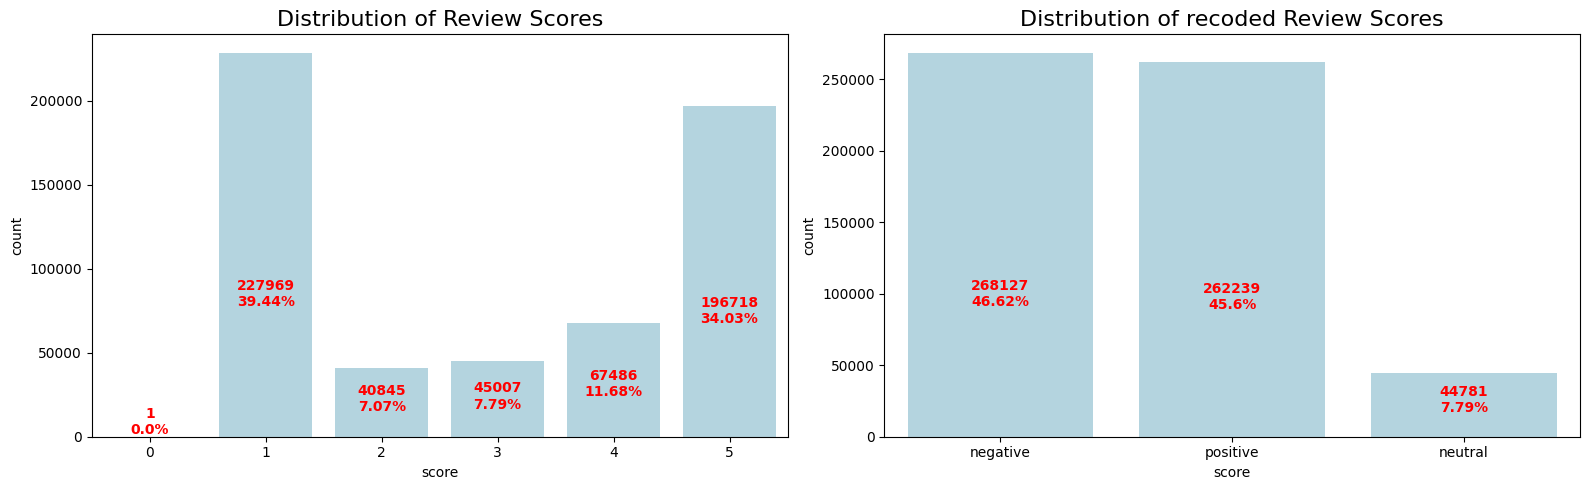

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16,5)) #fix the figure size
ax = ax.ravel()
plt.sca(ax[0])
sns.countplot(x='score', data=df, color='lightblue') #plot distribution plot 
score_count = df['score'].value_counts() #count the score number
prop = score_count / len(df) *100

for i in score_count.index:
    plt.text(i, score_count[i]/3, 
    str(score_count[i])+'\n'+str(np.round(prop[i],2))+'%',
    ha='center', va='bottom', color='red', weight='bold')
plt.title('Distribution of Review Scores',fontsize=16)

plt.sca(ax[1])
sns.countplot(x='score', data=df2, color='lightblue')
score_count2 = df2['score'].value_counts()
prop2 = score_count2 / len(df2) *100
for i in range(3):
    plt.text(i, score_count2[i]/3, 
             str(score_count2[i])+'\n'+str(np.round(prop2[i],2))+'%',
             ha='center', va='bottom', color='red', weight='bold')
plt.title('Distribution of recoded Review Scores',fontsize=16)

plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Word Frequency in Positive and Negative Reviews

In [30]:
neg_text = df2[df2['score'] == 'negative']['token_content'] #save the negative reviews
pos_text = df2[df2['score'] == 'positive']['token_content'] #save the positive reviews 

In [31]:
# count word frequency for negative reviews
neg_word_freq = {}

for text_data in neg_text:
    for word in text_data:
        if word not in stop_new:
            if word not in neg_word_freq:
                neg_word_freq[word] = 1
            else:
                neg_word_freq[word] += 1
        else:
            pass

In [32]:
# count word frequency for positive reviews
pos_word_freq = {}

for text_data in pos_text:
    for word in text_data:
        if word not in stop_new:
            if word not in pos_word_freq:
                pos_word_freq[word] = 1
            else:
                pos_word_freq[word] += 1
        else:
            pass

In [33]:
# freq list
neg_freq_list = list(neg_word_freq.items())
neg_freq_df = pd.DataFrame(neg_freq_list,columns=['Words','Freq'])
neg_freq_df_sorted = neg_freq_df.sort_values(by='Freq',ascending=False)
print("Top 3 negetive words:")
display(neg_freq_df_sorted.head(3))

pos_freq_list = list(pos_word_freq.items())
pos_freq_df = pd.DataFrame(pos_freq_list,columns=['Words','Freq'])
pos_freq_df_sorted = pos_freq_df.sort_values(by='Freq',ascending=False)
print("Top 3 positive words:")
display(pos_freq_df_sorted.head(3))

Top 3 negetive words:


,Words,Freq
11,app,112330
18,not,59130
72,no,51588


Top 3 positive words:


,Words,Freq
24,app,61178
0,good,49865
4,great,26959


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

In the two tables above, we can see from the top 3 words in positive and negative reviews respectively. In negative reviews, the top words are `app`, `not` and `no` while in the positive reviews, the top words are `app`, `good` and `great`. However, those words like `app` are not meaningful and informative enough for sentiment prediction.

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

To explore the content for positive and negative reviews, we created word cloud images for two separate classes showing top keywords for negative and positive classes. We also investigated the word frequency for positive and negative reviews. 

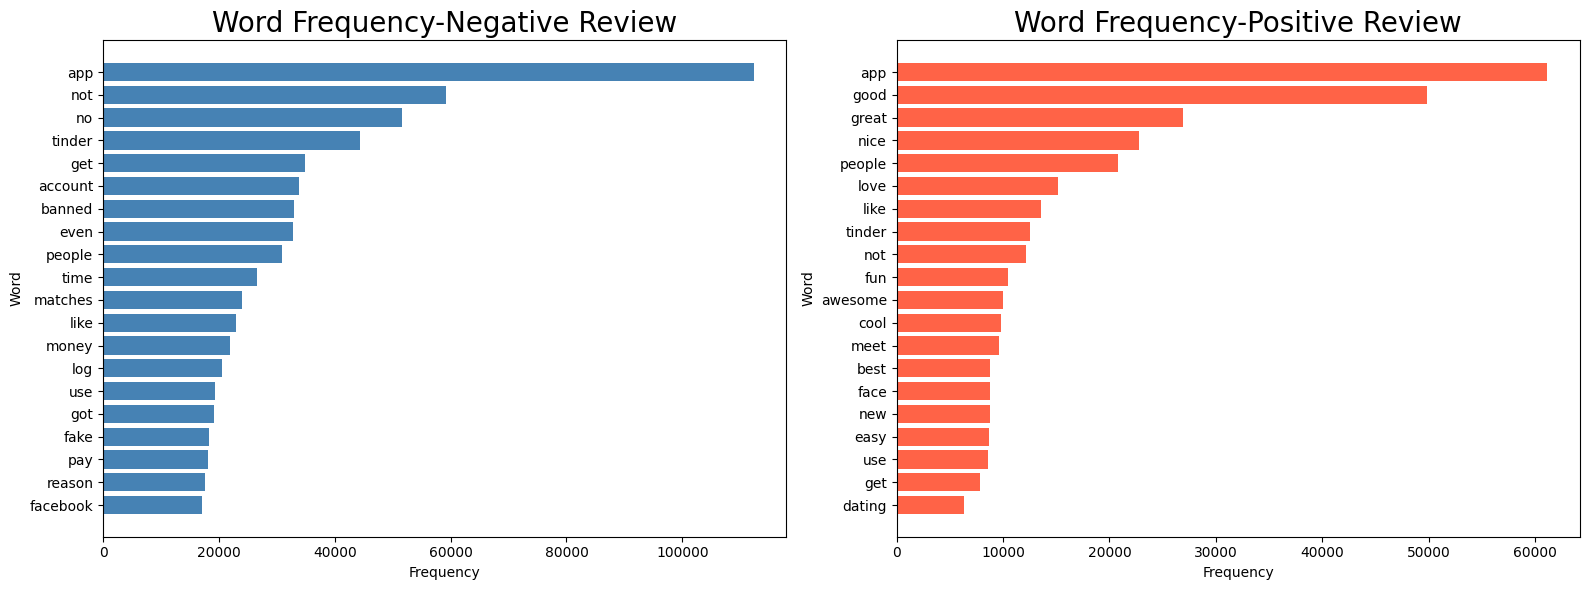

In [34]:
# plot word frequency for negative review (most common words top 20)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax = ax.ravel()
plt.sca(ax[0])
plt.barh(neg_freq_df_sorted['Words'][:20][::-1],neg_freq_df_sorted['Freq'][:20][::-1],color='steelblue')
# plt.xticks(rotation=75)
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Word Frequency-Negative Review", fontsize=20)

# plot word frequency for positive review (most common words top 20)
plt.sca(ax[1])
plt.barh(pos_freq_df_sorted['Words'][:20][::-1],pos_freq_df_sorted['Freq'][:20][::-1],color='tomato')
# plt.xticks(rotation=75)
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Word Frequency-Positive Review", fontsize=20)

plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

From plots above, we can see the top words in positive and negative reviews respectively. In negative reviews, the top 3 words are `app`, `not` and `no` while in the positive reviews, the 3 top words are `app`, `good` and `great`. However, those words like `app` are not meaningful and informative enough for sentiment prediction.

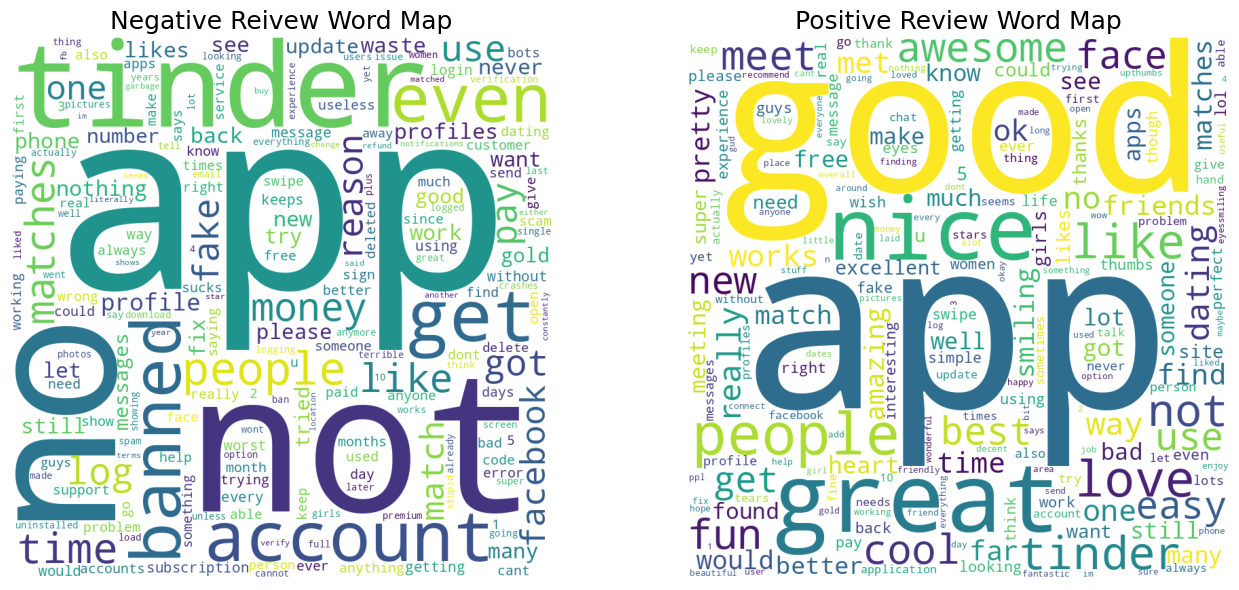

In [35]:
# Generating WordClouds
sorted_word_list1 = {k:v for k, v in sorted(neg_word_freq.items(), key=lambda item: item[1])}
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(sorted_word_list1)

sorted_word_list2 = {k:v for k, v in sorted(pos_word_freq.items(), key=lambda item: item[1])}
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(sorted_word_list2)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax = ax.ravel()
plt.sca(ax[0])
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("Negative Reivew Word Map",fontsize= 18)

plt.sca(ax[1])
plt.title("Positive Review Word Map",fontsize= 18)
plt.imshow(wordcloud2)
plt.axis("off")

plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

The word clouds suggested that the top words for positive reviews are `good`, `app`, `nice`, `great`, `love`, and `tinder`. In contrast, the top words for negative reviews are `app`, `banned`, `no`, `not`, `tinder`. It provides some intuitive understanding for us that we need to apply contextual-based embedding models in the next step. However, we can see that words such as 'tinder', 'people', and 'account' that do not have any sentiments are also included as frequent words. In the next step, we repeated analyses by using opinion lexicon containing only words that express negative feeling and positive feelings. 

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Lexicon-based Method for Word Frequency 

We further investigated a [lexicon-based method](https://github.com/jeffreybreen/twitter-sentiment-analysis-tutorial-201107/tree/master/data/opinion-lexicon-English
) for sentiment analysis using pre-defined dictionary. Based on our previous observations that shows the positive and negative reviews have different keywords, we applied a sentiment lexicon for opinion review to plot the distribution of negative and positive keywords across positive and negative reviews. The opinion lexicon for positive and negative keywords is around 4,000 words in total,  and then we plotted the word cloud for positive words in positive review and negative words in negative review. We selected the top 10 most frequently appeared positive words in positive reviews as pos_key and the top 10 most frequently appeared negative words in negative reviews as neg_key. 

In [36]:
# apply lexicon-based method for sentiment analysis
pos_file = 'positive_words.txt'
positive_words = pd.read_table(pos_file, names=['words'], encoding='ISO-8859-1')['words'].tolist()
neg_file = 'negative_words.txt'
negative_words = pd.read_table(neg_file, names=['words'], encoding='ISO-8859-1')['words'].tolist()

In [37]:
# count word frequency for negative reviews via sentiment analysis
neg_word_neg_freq = {}

for text_data in neg_text:
    for word in text_data:
        if word not in stop_new and word in negative_words:
            if word not in neg_word_neg_freq:
                neg_word_neg_freq[word] = 1
            else:
                neg_word_neg_freq[word] += 1
        else:
            pass

In [38]:
# count word frequency for positive reviews via sentiment analysis
pos_word_pos_freq = {}

for text_data in pos_text:
    for word in text_data:
        if word not in stop_new and word in positive_words:
            if word not in pos_word_pos_freq:
                pos_word_pos_freq[word] = 1
            else:
                pos_word_pos_freq[word] += 1
        else:
            pass

In [39]:
# sentiment analysis freq list
neg_freq_neg_list = list(neg_word_neg_freq.items())
neg_freq_neg_df = pd.DataFrame(neg_freq_neg_list,columns=['Negative_Words','Freq'])
neg_freq_neg_df_sorted = neg_freq_neg_df.sort_values(by='Freq',ascending=False)

pos_freq_pos_list = list(pos_word_pos_freq.items())
pos_freq_pos_df = pd.DataFrame(pos_freq_pos_list,columns=['Positive_Words','Freq'])
pos_freq_pos_df_sorted = pos_freq_pos_df.sort_values(by='Freq',ascending=False)

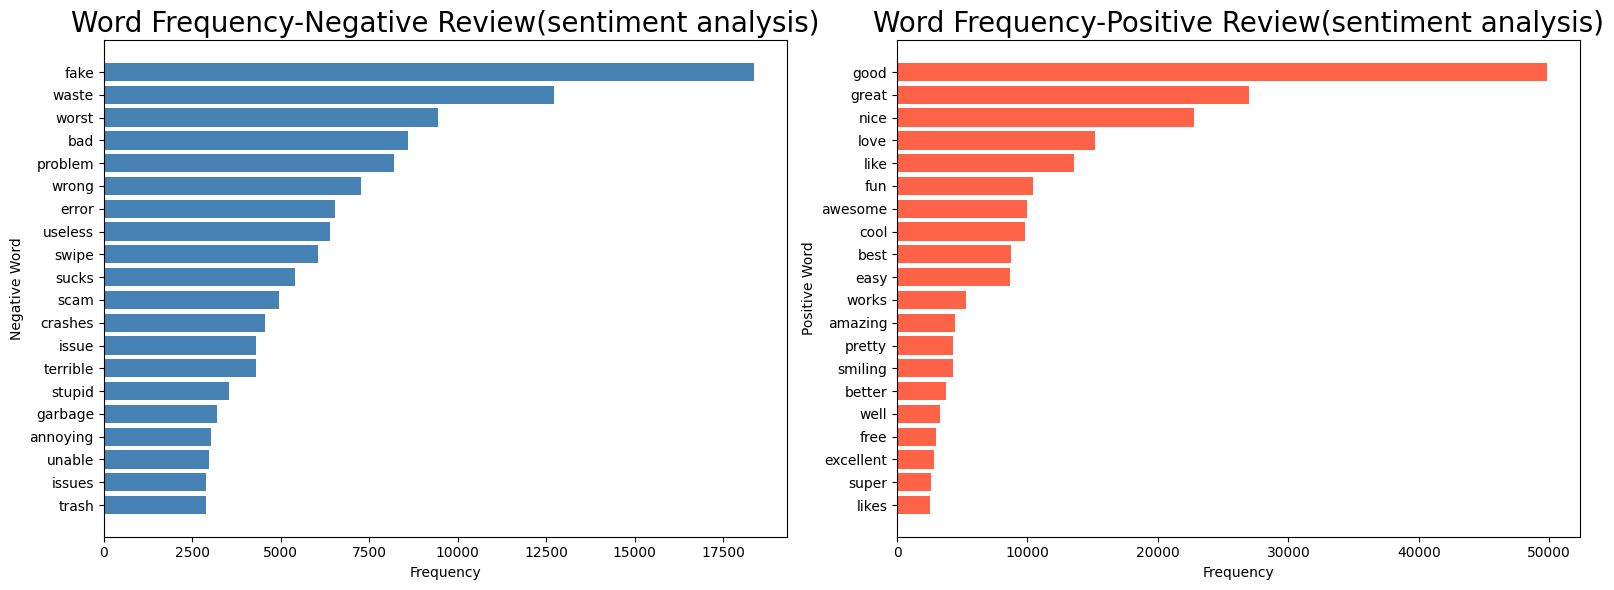

In [40]:
# plot word frequency for negative review (most common words top 20)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax = ax.ravel()
plt.sca(ax[0])
plt.barh(neg_freq_neg_df_sorted['Negative_Words'][:20][::-1],neg_freq_neg_df_sorted['Freq'][:20][::-1],color='steelblue')
# plt.xticks(rotation=75)
plt.ylabel("Negative Word")
plt.xlabel("Frequency")
plt.title("Word Frequency-Negative Review(sentiment analysis)", fontsize=20)

# plot word frequency for positive review (most common words top 20)
plt.sca(ax[1])
plt.barh(pos_freq_pos_df_sorted['Positive_Words'][:20][::-1],pos_freq_pos_df_sorted['Freq'][:20][::-1],color='tomato')
# plt.xticks(rotation=75)
plt.ylabel("Positive Word")
plt.xlabel("Frequency")
plt.title("Word Frequency-Positive Review(sentiment analysis)", fontsize=20)

plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

The plots showed that in positive reviews, most reviews contain more positive words than negative, and vice versa. We can see that words like ‘app’, ‘tinder’, and ‘account’ that previously appeared in word frequency for both positive and negative reviews but have no sentimental meanings have now been removed. Instead, according to the frequency plots and word clouds, `good`,`great`,`nice`,`love`,`like` were ranked as top words in negative reviews while `fake`,`waste`,`worst`,`bad`,`problem` were ranked as top words in negative reviews. 

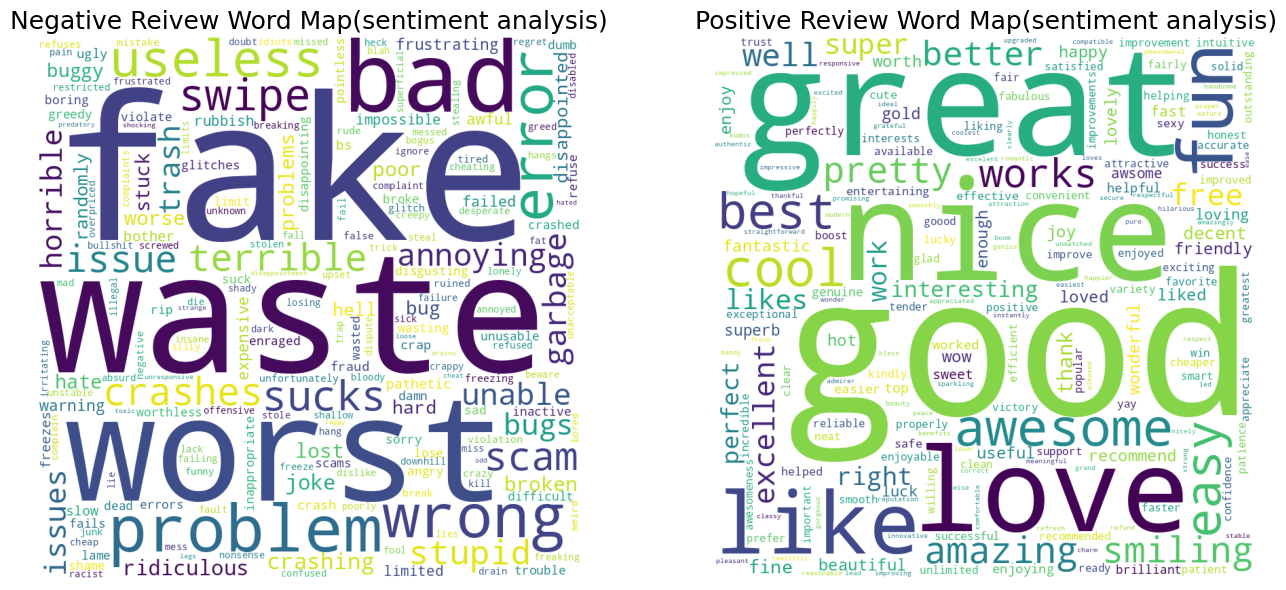

In [41]:
# Generating WordClouds
sorted_word_list3 = {k:v for k, v in sorted(neg_word_neg_freq.items(), key=lambda item: item[1])}
wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(sorted_word_list3)

sorted_word_list4 = {k:v for k, v in sorted(pos_word_pos_freq.items(), key=lambda item: item[1])}
wordcloud4 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(sorted_word_list4)

fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax = ax.ravel()
plt.sca(ax[0])
plt.imshow(wordcloud3)
plt.axis("off")
plt.title("Negative Reivew Word Map(sentiment analysis)",fontsize= 18)

plt.sca(ax[1])
plt.title("Positive Review Word Map(sentiment analysis)",fontsize= 18)
plt.imshow(wordcloud4)
plt.axis("off")

plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 3.2 Summary Statistics

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### Length Distribution
We plotted the distribution of review lengh. From the plot below, we can observe most of reviews are less than 40 words.

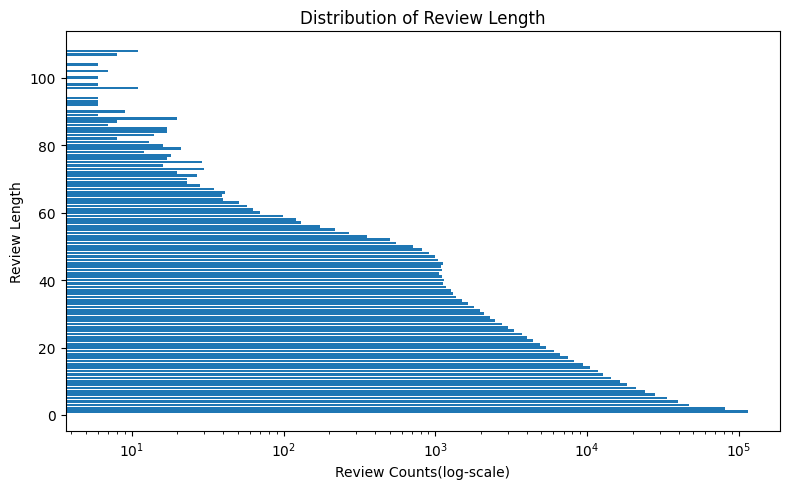

In [42]:
word_count = df2['word_count'].value_counts()
plt.subplots(figsize=(8,5))
plt.barh(word_count.index[:100],word_count.values[:100],align='center')
plt.xscale("log")
plt.xlabel('Review Counts(log-scale)')
plt.ylabel('Review Length')
plt.title("Distribution of Review Length")
plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### Correlation matrix
We attempted to conduct an analysis on the correlation between the three variables, namely “score_rate”, “thumbsUpCount”, and “word_count”. As shown in the Figure below, we did not find any significant correlation between any of the variables. This is potentially caused by the non-continuous nature of our data and the complex relationships between features. Correlation plots may not be the most effective method for analyzing the relationship between variables in this case.

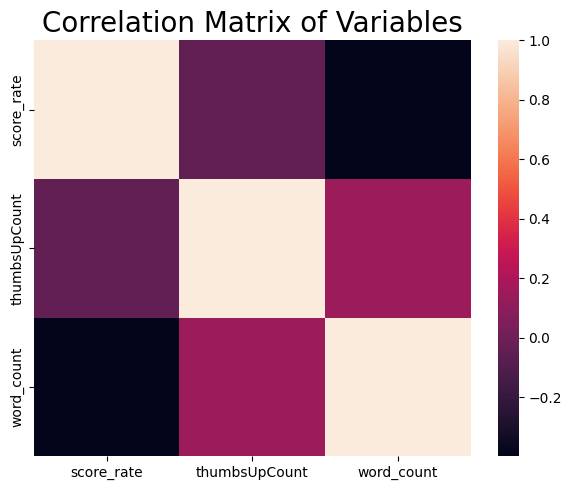

In [43]:
#correlation matrix
df2 = df2[df2['score'] != 'neutral']
df2['score_rate'] = df2['score'].replace({'negative':0, 'positive':1})
df2['score_rate'] = df2['score_rate'].apply(lambda x: int(x))
selected_col = ['score_rate','thumbsUpCount','word_count']

plt.subplots(figsize=(6,5))
sns.heatmap(df2[selected_col].corr())
plt.title("Correlation Matrix of Variables", fontsize=20)
plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### Distribution of Keywords in Negative and Positive reviews
We plotted the distribution of negative and positive key words for negative reviews and positive reviews. It indicates that in negative reviews there are more negative key words than positive one. In other words, positive words have lower frequency than negative words in negative reviews. In contrast, positive words have higher frequency than negative words in positive reviews. 

In [44]:
neg_data =  df2[df2['score_rate']== 0]['token_content'] #find negative reviews
scores_neg = np.zeros((len(neg_data),2))
pos_key = pos_freq_pos_df_sorted['Positive_Words'][:10].tolist()#use top 10 positive words that most frequently appeared in positive reviews as positive key
neg_key = neg_freq_neg_df_sorted['Negative_Words'][:10].tolist()#use top 10 negative words that most frequently appeared in negative reviews as negative key
for j in range(len(pos_key)):
    for i in range(scores_neg.shape[0]):
        scores_neg[i,0] += neg_data.iloc[i].count(pos_key[j]) #count the occurances of positive keys in negative review
        scores_neg[i,1] += neg_data.iloc[i].count(neg_key[j]) #count the occurances of negative keys in negative review

pos_data = df2[df2['score_rate']== 1]['token_content'] #find positive reviews
scores_pos = np.zeros((len(pos_data),2))
for j in range(len(pos_key)):
    for i in range(scores_pos.shape[0]):
        scores_pos[i,0] += pos_data.iloc[i].count(pos_key[j])#count the occurances of positive keys in positive review
        scores_pos[i,1] += pos_data.iloc[i].count(neg_key[j])#count the occurances of negative keys in positive review

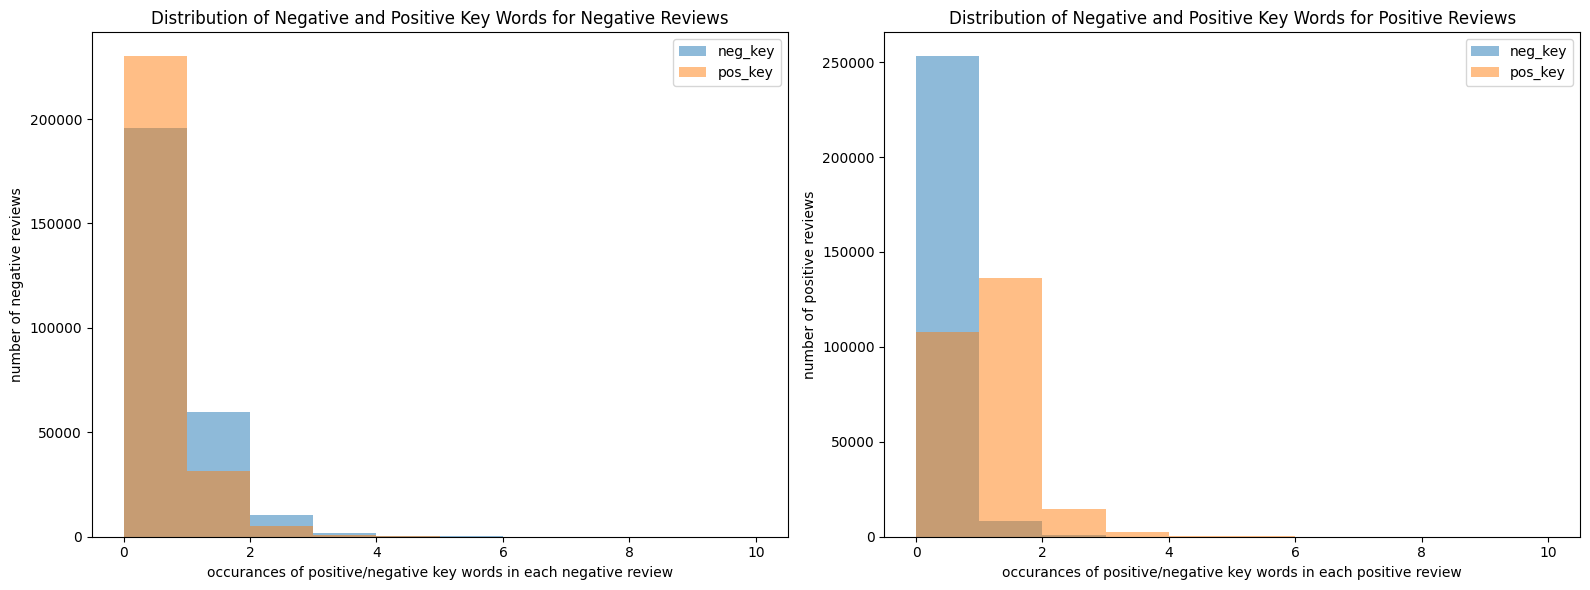

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax = ax.ravel()
plt.sca(ax[0])
plt.hist(scores_neg[:,1], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='neg_key')
plt.hist(scores_neg[:,0], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='pos_key')
plt.legend(loc=0)
plt.title("Distribution of Negative and Positive Key Words for Negative Reviews")
plt.xlabel('occurances of positive/negative key words in each negative review')
plt.ylabel('number of negative reviews')

plt.sca(ax[1])
plt.hist(scores_pos[:,1], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='neg_key')
plt.hist(scores_pos[:,0], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='pos_key')
plt.legend(loc=0)
plt.title("Distribution of Negative and Positive Key Words for Positive Reviews")
plt.xlabel('occurances of positive/negative key words in each positive review')
plt.ylabel('number of positive reviews')
plt.tight_layout()

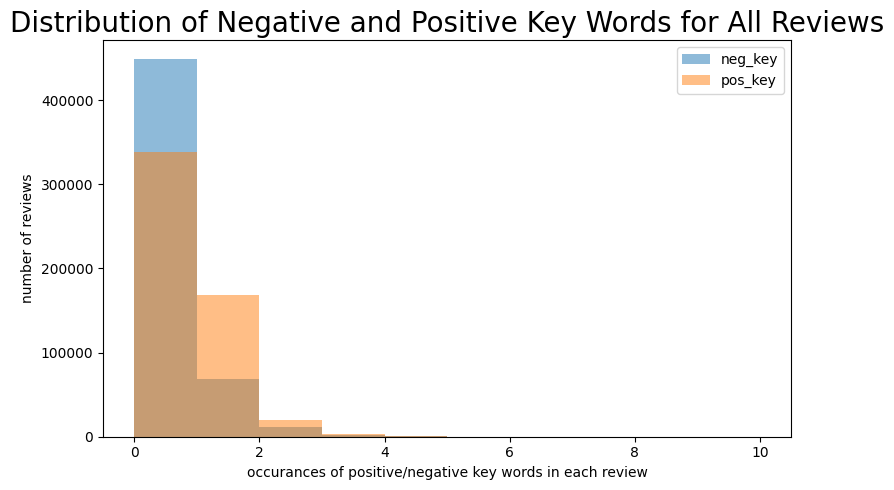

In [46]:
content_data =  df2['token_content']
scores_pos = np.zeros((len(content_data),2))
# print(content_data)

for j in range(len(pos_key)):
    for i in range(scores_pos.shape[0]):
        # print(i,j)
        scores_pos[i,0] += content_data.iloc[i].count(pos_key[j])#count the occurances of positive keys in all reviews
        scores_pos[i,1] += content_data.iloc[i].count(neg_key[j])#count the occurances of negative keys in all reviews

plt.subplots(figsize=(8,5))
plt.hist(scores_pos[:,1], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='neg_key')
plt.hist(scores_pos[:,0], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='pos_key')
plt.legend(loc=0)
plt.title("Distribution of Negative and Positive Key Words for All Reviews",fontsize=20)
plt.xlabel('occurances of positive/negative key words in each review')
plt.ylabel('number of reviews')
plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

We also plotted the distribution of both negative and positive key words in all reviews, indicating that negative key words had lower frequency than positive key words. 

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 3.3 Identify Outlier Words Using TFIDF

Since we are doing a NLP task, our features are text data collected from tinder users’ reviews. In this case, the features should be vectorized capturing information about each word in the text so that they could act as model inputs. We chose to vectorize our text data using TF-IDF, which evaluates how relevant a word is to a sentence in a given corpus. We first considered transforming the text data by unigram and bigram models, and applied the Sklearn TfidfVectorizer. After obtaining the TF-IDF score matrix, we computed the mean, standard deviation, max and min of the TF-IDF score for each word across all documents in the corpus along with its length, and presented them in tables and plots.

In [47]:
content_data =  df2['content_emoji']

#unigrams TF-IDF
vectorizer_uni = TfidfVectorizer(tokenizer=tokenize_clean) #use the tokenizer we previously defined
tfidf_matrix_uni = vectorizer_uni.fit_transform(content_data)

#bigrams TF-IDF
vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), tokenizer=tokenize_clean) #use the tokenizer we previously defined
tfidf_matrix_bi = vectorizer_bi.fit_transform(content_data)

In [48]:
word_tfidf_avg_uni = tfidf_matrix_uni.mean(axis=0) #mean of the unigram tf-idf scores for each word across all comments
voc_uni = vectorizer_uni.get_feature_names_out() #words for the unigram tf-idf matrix

In [49]:
t = tfidf_matrix_uni.copy()
a = word_tfidf_avg_uni.copy()
word_tfidf_var_uni = t.power(2).mean(axis=0)- np.square(a)#variance of the unigram tf-idf scores for each word across all comments
word_tfidf_std_uni = np.sqrt(word_tfidf_var_uni) #std of the unigram tf-idf scores for each word across all comments

In [50]:
word_tfidf_max_uni = tfidf_matrix_uni.max(axis=0)#max of the tf-idf scores for each word across all comments
word_tfidf_min_uni = tfidf_matrix_uni.min(axis=0)#min of the tf-idf scores for each word across all comments

In [51]:
word_tfidf_avg_uni = word_tfidf_avg_uni.reshape(-1,1)
voc_uni = voc_uni.reshape((-1,1))
word_tfidf_std_uni = word_tfidf_std_uni.reshape((-1,1))
word_tfidf_max_uni = word_tfidf_max_uni.reshape((-1,1)).toarray()
word_tfidf_min_uni = word_tfidf_min_uni.reshape((-1,1)).toarray()

In [52]:
#dataframe with mean and std tfidf score for each word
tfidf_df_uni = pd.DataFrame(voc_uni, columns=['word'])
tfidf_df_uni['std of unigram tfidf score'] = word_tfidf_std_uni 
tfidf_df_uni['mean of unigram tfidf score'] = word_tfidf_avg_uni 
tfidf_df_uni['max of unigram tfidf score '] = word_tfidf_max_uni 
tfidf_df_uni['min of unigram tfidf score'] = word_tfidf_min_uni 

In [53]:
tfidf_df_uni['word_length'] = tfidf_df_uni['word'].apply(lambda x:len(x))#get the length of each word 

In [54]:
tfidf_df_uni

,word,std of unigram tfidf score,mean of unigram tfidf score,max of unigram tfidf score,min of unigram tfidf score,word_length
0,0,0.019903,1.195467e-03,1.000000,0.0,1
1,00,0.005924,9.097637e-05,0.821438,0.0,2
2,000,0.006058,1.186735e-04,0.853340,0.0,3
3,0000,0.001411,3.816513e-06,0.657545,0.0,4
4,00000,0.000424,6.784197e-07,0.303814,0.0,5
...,...,...,...,...,...,...
77472,zzzxx,0.001022,1.403411e-06,0.744322,0.0,5
77473,zzzz,0.003369,1.472317e-05,1.000000,0.0,4
77474,zzzzz,0.002205,6.610298e-06,1.000000,0.0,5
77475,zzzzzzz,0.000877,1.687914e-06,0.508408,0.0,7


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### Unigram
To find out which words are most important and relevant to the documents, we sorted the words by their mean TF-IDF score and extracted the top 20 words, as shown in the table below. As we can see the top ones include `good`, `app`, `nice`, `great`, etc., this agrees with the word frequency results that we previously generated - these words also appeared to be the ones with high frequency. 

In [55]:
tfidf_df_uni.sort_values(by='mean of unigram tfidf score',ascending=False)[:20] # top 20 words that have the highest mean tfidf score 

,word,std of unigram tfidf score,mean of unigram tfidf score,max of unigram tfidf score,min of unigram tfidf score,word_length
28787,good,0.215946,0.062806,1.000000,0.0,4
4417,app,0.115371,0.054032,1.000000,0.0,3
46609,nice,0.159184,0.031314,1.000000,0.0,4
29270,great,0.149174,0.030670,1.000000,0.0,5
47324,not,0.073668,0.021751,1.000000,0.0,3
40871,love,0.115426,0.017546,1.000000,0.0,4
47002,no,0.066405,0.017464,1.000000,0.0,2
51063,people,0.062700,0.016628,1.000000,0.0,6
68322,tinder,0.058569,0.015178,1.000000,0.0,6
6126,awesome,0.113912,0.014845,1.000000,0.0,7


In [56]:
# stats summary for the mean tfidf score of each word
tfidf_df_uni['mean of unigram tfidf score'].describe()

count    7.747700e+04
mean     3.005034e-05
std      4.579924e-04
min      4.987118e-08
25%      7.040669e-07
50%      1.277127e-06
75%      2.871741e-06
max      6.280632e-02
Name: mean of unigram tfidf score, dtype: float64

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

We also identified the words that have relatively low mean TF-IDF scores under a threshold that equals to 1.5 times the 25th percentile value of all words’ mean TF-IDF scores. As we can see from the table below, most of them are misspelled or nonsense words. 

In [57]:
#identify words with very low mean unigram tfidf score using a threshold equal to 1.5x the lower percentile mean tfidf score (7.100453e-07)
threshold_uni = 7.040669e-07*1.5
low_tfidf_words_uni = pd.DataFrame(tfidf_df_uni[tfidf_df_uni['mean of unigram tfidf score']<threshold_uni])
low_tfidf_words_uni.sort_values(by='mean of unigram tfidf score', ascending=False)

,word,std of unigram tfidf score,mean of unigram tfidf score,max of unigram tfidf score,min of unigram tfidf score,word_length
73063,vertified,0.000769,1.056087e-06,0.560112,0.0,9
6370,azan,0.000769,1.056060e-06,0.560098,0.0,4
16269,cwwww,0.000769,1.056035e-06,0.560085,0.0,5
59067,rze,0.000769,1.056035e-06,0.560085,0.0,3
39542,lettikng,0.000769,1.056021e-06,0.560077,0.0,8
...,...,...,...,...,...,...
2809,akseptface,0.000037,5.146262e-08,0.027294,0.0,10
49819,packig,0.000037,5.146262e-08,0.027294,0.0,6
59765,scammersdouble,0.000036,4.987118e-08,0.026450,0.0,14
42126,markdo,0.000036,4.987118e-08,0.026450,0.0,6


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

From the plot describing TF-IDF scores obtained with the unigram model, we can see that words such as `app`, `not`, `people`, `tinder`, `get`, and etc. that do not express sentiments are also presented with high relevance because they are commonly used words. 

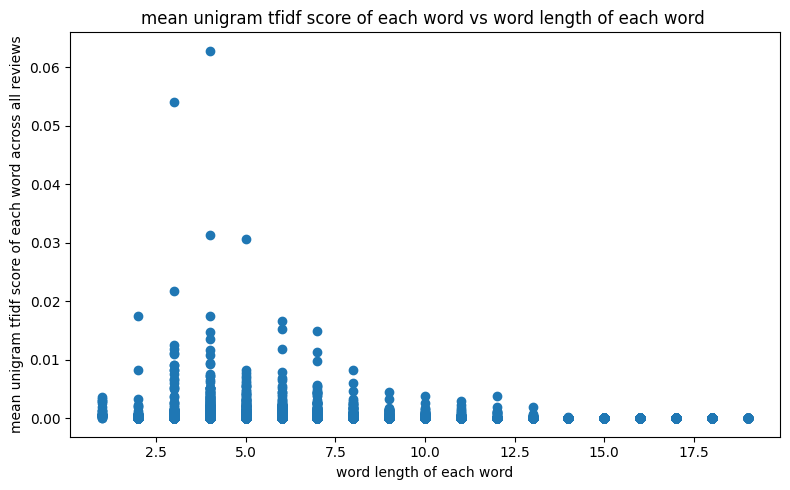

In [58]:
plt.subplots(figsize=(8,5))
plt.scatter(tfidf_df_uni['word_length'], tfidf_df_uni['mean of unigram tfidf score'])
plt.xlabel('word length of each word')
plt.ylabel('mean unigram tfidf score of each word across all reviews')
plt.title('mean unigram tfidf score of each word vs word length of each word ')
plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### Bigram 
To make more sense of these words, we performed a TF-IDF vectorization by a bigram model to see if phrases containing these words are more semantic in detecting sentiments. We applied the Sklearn TfidfVectorizer with the parameter ngram_range equals to (2,2) and obtained the summary statistics of each phrase across all the documents, as shown in the table below.

In [59]:
word_tfidf_avg_bi = tfidf_matrix_bi.mean(axis=0) #mean of the bigram tf-idf scores for each word across all comments
voc_bi = vectorizer_bi.get_feature_names_out() #words for the bigram tf-idf matrix 

In [60]:
tt = tfidf_matrix_bi.copy()
aa = word_tfidf_avg_bi.copy()
word_tfidf_var_bi = tt.power(2).mean(axis=0)- np.square(aa)#variance of the bigram tf-idf scores for each word across all comments
word_tfidf_std_bi = np.sqrt(word_tfidf_var_bi) #std of the bigram tf-idf scores for each word across all comments

In [61]:
word_tfidf_max_bi = tfidf_matrix_bi.max(axis=0)#max of the bigram tf-idf scores for each word across all comments
word_tfidf_min_bi = tfidf_matrix_bi.min(axis=0)#min of the bigram tf-idf scores for each word across all comments

In [62]:
word_tfidf_avg_bi = word_tfidf_avg_bi.reshape(-1,1)
voc_bi = voc_bi.reshape((-1,1))
word_tfidf_std_bi = word_tfidf_std_bi.reshape((-1,1))
word_tfidf_max_bi = word_tfidf_max_bi.reshape((-1,1)).toarray()
word_tfidf_min_bi = word_tfidf_min_bi.reshape((-1,1)).toarray()

In [63]:
#dataframe with mean and std bigram tfidf score for each word
tfidf_df_bi = pd.DataFrame(voc_bi, columns=['phrase'])
tfidf_df_bi['std of bigram tfidf score'] = word_tfidf_std_bi 
tfidf_df_bi['mean of bigram tfidf score'] = word_tfidf_avg_bi 
tfidf_df_bi['max of bigram tfidf score'] = word_tfidf_max_bi 
tfidf_df_bi['min of bigram tfidf score'] = word_tfidf_min_bi 

In [64]:
tfidf_df_bi['phrase_length'] = tfidf_df_bi['phrase'].apply(lambda x:len(x))#get the length of each word 
tfidf_df_bi

,phrase,std of bigram tfidf score,mean of bigram tfidf score,max of bigram tfidf score,min of bigram tfidf score,phrase_length
0,0 0,0.002348,1.216879e-05,1.000000,0.0,3
1,0 00,0.000481,1.238744e-06,0.221996,0.0,4
2,0 000,0.000443,6.078206e-07,0.322367,0.0,5
3,0 00000000000001,0.000366,5.022561e-07,0.266380,0.0,16
4,0 00000001,0.000680,1.279888e-06,0.424525,0.0,10
...,...,...,...,...,...,...
1113536,zzz thing,0.000619,8.499282e-07,0.450773,0.0,9
1113537,zzz tried,0.000546,7.500598e-07,0.397806,0.0,9
1113538,zzz women,0.000333,4.575628e-07,0.242676,0.0,9
1113539,zzzz means,0.000280,3.839437e-07,0.203631,0.0,10


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

We also extracted the top 20 phrases that have the highest bigram TF-IDF score and presented them in below table. From the table we can see that the top phrases contain ‘good app’, ‘great app’, ‘easy use’, ‘waste time’ and etc. These phrases appear to be more explainable in detecting sentiments than some of the high frequency words that we previously seen in the unigram model. 

In [65]:
tfidf_df_bi.sort_values(by='mean of bigram tfidf score',ascending=False)[:20] # top 20 phrases that have the highest mean bigram tfidf score

,phrase,std of bigram tfidf score,mean of bigram tfidf score,max of bigram tfidf score,min of bigram tfidf score,phrase_length
404031,good app,0.095466,0.011041,1.000000,0.0,8
412319,great app,0.093015,0.010359,1.000000,0.0,9
644650,nice app,0.090166,0.009051,1.000000,0.0,8
649852,no reason,0.037012,0.004189,1.000000,0.0,9
281742,easy use,0.050051,0.003932,1.000000,0.0,8
1067484,waste time,0.043681,0.003738,1.000000,0.0,10
112854,banned no,0.036046,0.003403,1.000000,0.0,9
1097387,worst app,0.046650,0.003363,1.000000,0.0,9
235031,dating app,0.032494,0.002817,1.000000,0.0,10
560221,love app,0.045372,0.002646,1.000000,0.0,8


In [66]:
tfidf_df_bi['mean of bigram tfidf score'].describe()

count    1.113541e+06
mean     1.864040e-06
std      2.363594e-05
min      1.207131e-08
25%      4.062296e-07
50%      6.111278e-07
75%      1.088588e-06
max      1.104127e-02
Name: mean of bigram tfidf score, dtype: float64

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

Likewise, with bigram model, we also identified the phrases with relatively low bigram TF-IDF scores under a threshold that equals to 1.5 times the 25th percentile value of all phrases’ mean TF-IDF scores. From the table below, we can see that most of the phrases such as ‘times old’, ‘saying protect’ or ‘number saying’ are hard to interpret. 

In [67]:
#identify words with very low bigram mean tfidf score using a threshold equal to 1.5x the lower percentile bigram mean tfidf score (4.091330e-07)
threshold_bi = 4.062296e-07*1.5
low_tfidf_words_bi = pd.DataFrame(tfidf_df_bi[tfidf_df_bi['mean of bigram tfidf score']<threshold_bi])
low_tfidf_words_bi.sort_values(by='mean of bigram tfidf score', ascending=False)

,phrase,std of bigram tfidf score,mean of bigram tfidf score,max of bigram tfidf score,min of bigram tfidf score,phrase_length
986036,times old,0.000315,6.093436e-07,0.173940,0.0,9
842291,saying protect,0.000444,6.093391e-07,0.323173,0.0,14
767318,protect accounts,0.000444,6.093391e-07,0.323173,0.0,16
666610,numbers saying,0.000444,6.093391e-07,0.323173,0.0,14
788226,really asking,0.000444,6.093391e-07,0.323173,0.0,13
...,...,...,...,...,...,...
347501,finding baby,0.000011,1.457575e-08,0.007730,0.0,12
975623,thinks finding,0.000011,1.457575e-08,0.007730,0.0,14
178219,cheating thats,0.000009,1.207131e-08,0.006402,0.0,14
1086789,woman loudly,0.000009,1.207131e-08,0.006402,0.0,12


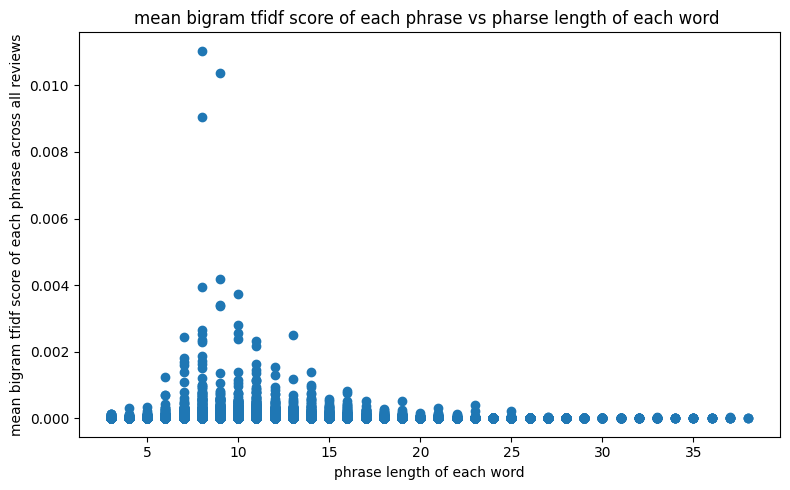

In [68]:
plt.subplots(figsize=(8,5))
plt.scatter(tfidf_df_bi['phrase_length'], tfidf_df_bi['mean of bigram tfidf score'])
plt.xlabel('phrase length of each word')
plt.ylabel('mean bigram tfidf score of each phrase across all reviews')
plt.title('mean bigram tfidf score of each phrase vs pharse length of each word ')
plt.tight_layout()

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

**Meaningful Insights:** According to the distribution of sentiment labels, we have balanced the dataset to avoid the sentiment analysis model to be biased towards the majority class. Aside from insights presented above based on summary statistics, from scatter plots above we can see that the distribution is close to a right-skewed normal distribution. A high mean TF-IDF score for a term suggests that the term is both important to that document and relatively unique across the corpus. Terms with long length tend to have low TF-IDF score possibly because the word space between certain words is accidentally missing and tokenization treats them to be a single word that rarely appears in other reviews. Language other than English, misspelled words (e.g., ‘gerlfrend’), and nonsense words (e.g., ‘aaaaaaaa’) could be another reason. 

<div class="alert alert-success" style="color: #333; background-color: #e6efff; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 30px;">

<a id="part4"></a>
    
# 4) Modeling Approach & Results

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 4.0 Preprocessing

In the following part, we loaded cleaned data that had missing 'content' dropped, balanced positive and negative responses, and Emoji transferred to texts. Before training the model, we further tokenized and padded the cleaned data using the TensorFlow built-in functions 'tokenization' and 'pad_sequences'. Then we randomly split the dataset into training data, validation data, and test data (64%, 16%, 20%).

We created a TensorFlow Dataset Pipeline to optimize our training process. Specifically, we shuffled our data, batched it into smaller chunks, and prefetched it to keep the GPU busy while the CPU is preparing the next batch. Moreover, to improve coding efficiency, we generated a function for model buidling and another function to plot model performance across epochs. 

In [69]:
# !gdown "https://drive.google.com/uc?id=1MbdoEx3tdLxl-CdRVMATNkPCXnbXMNkZ"

In [70]:
df2 = pd.read_csv("transfer_emoji.csv")
df2

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,content_emoji,token_content
0,0,db9b1a26-a9c0-4cf4-968e-36f5533c74a6,Paul Butler,https://play-lh.googleusercontent.com/a-/ACB-R...,"It's a bit pricey, but they have sales. It sti...",0,0,14.5.0,2023-03-24 00:55:46,NaN,NaN,"It's a bit pricey, but they have sales. It sti...","['bit', 'pricey', 'sales', 'still', 'works', '..."
1,1,0c6285a0-6af7-481e-b96c-d1b7c8c7ccf5,Kenneth Ng,https://play-lh.googleusercontent.com/a-/ACB-R...,Not as fun as you think. You need to pay to se...,0,0,14.4.2,2023-03-24 00:54:14,NaN,NaN,Not as fun as you think. You need to pay to se...,"['not', 'fun', 'think', 'need', 'pay', 'see', ..."
2,2,1ea3366b-bb07-467b-a796-36d082fb430c,Stoke,https://play-lh.googleusercontent.com/a-/ACB-R...,hated it!,0,0,14.4.2,2023-03-24 00:53:53,NaN,NaN,hated it!,['hated']
3,3,2542b216-f592-41a7-a852-f6cc144dffc1,Clay Wood,https://play-lh.googleusercontent.com/a/AGNmyx...,I thought this app was for hookups? half the g...,0,0,14.4.2,2023-03-24 00:49:45,NaN,NaN,I thought this app was for hookups? half the g...,"['thought', 'app', 'hookups', 'half', 'girls',..."
4,4,2aadea08-8d2f-4cf0-b9ed-65c94101e9dd,Matt K,https://play-lh.googleusercontent.com/a-/ACB-R...,What a joke. I've had this app for almost two ...,0,0,NaN,2023-03-24 00:48:43,NaN,NaN,What a joke. I've had this app for almost two ...,"['joke', 'app', 'almost', 'two', 'years', 'ran..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533013,579359,c9c6a2e3-4d65-4d3c-b434-d027dd7d81a9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Best app ever finally on android,1,2,1.0,2013-07-15 23:02:49,NaN,NaN,Best app ever finally on android,"['best', 'app', 'ever', 'finally', 'android']"
533014,579360,e418f4c2-78ca-4e93-93fa-d522d2ef2cb2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Tinder is extremely buggy on the galaxy S4 act...,0,0,1.0,2013-07-15 22:43:41,"Hi Steven, thanks for trying out Tinder! Pleas...",2013-07-30 16:07:32,Tinder is extremely buggy on the galaxy S4 act...,"['tinder', 'extremely', 'buggy', 'galaxy', '4'..."
533015,579361,cfd8526b-e84b-4d4d-9989-3a5dc0a89b1a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Keeps crashing.,0,0,1.0,2013-07-15 22:27:15,"Hi, thanks for trying out Tinder! Please updat...",2013-07-30 16:07:41,Keeps crashing.,"['keeps', 'crashing']"
533016,579362,91829d43-289a-42af-b5ab-8f548339dd76,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Crashes. Doesn't load. Total failure. Take it ...,0,0,1.0,2013-07-15 22:20:31,"Hi Wesley, thanks for trying out Tinder! Pleas...",2013-07-30 16:07:52,Crashes. Doesn't load. Total failure. Take it ...,"['crashes', 'load', 'total', 'failure', 'take'..."


In [71]:
SEED = 20 #set the random seed

# train-test set split by a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(df2['content_emoji'], df2['score'], test_size=0.2,random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=SEED)

# count the unique words in text data 
words = X_train.copy()
words = words.apply(lambda x: x.lower().split()) 
unique = set()
for item in words:
    for elem in item:
        if elem not in unique:
            unique.add(elem)
n_words = len(unique)


# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=n_words, split=' ') #tokenize
tokenizer.fit_on_texts(X_train.values) # tokenizer fit on X_train data
X_train = tokenizer.texts_to_sequences(X_train) # Get X_train 
tokenizer.fit_on_texts(X_val.values) # tokenizer fit on X_val data
X_val = tokenizer.texts_to_sequences(X_val) # Get X_val
maxlen = 200
X_train = tf.keras.utils.pad_sequences(X_train, maxlen=maxlen) # pad sequences
X_val = tf.keras.utils.pad_sequences(X_val, maxlen=maxlen) # pad sequences

tokenizer.fit_on_texts(X_test.values)
X_test = tokenizer.texts_to_sequences(X_test) # Get X_test
X_test = tf.keras.utils.pad_sequences(X_test, maxlen=maxlen) # pad sequences

In [72]:
# save training and test data
np.save('X_train', X_train)
np.save('X_val', X_val)
np.save('X_test',X_test)
np.save('y_train', y_train)
np.save('y_val', y_val)
np.save('y_test',y_test)

### Import data

In [73]:
#Load training, validation, and testing data
maxlen=200
X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

### Data pipeline 

In [74]:
# Create a TensorFlow Dataset Pipeline to optimize our training process. 
# We shuffle our data, batch it into smaller chunks, and prefetch it to 
# keep the GPU busy while the CPU is preparing the next batch.

def dataset_pipline(x,y):
    # Convert data type to int
    x = np.asarray(x).astype('int')
    y = np.asarray(y).astype('int')

    # creates a dataset object by slicing the input arrays
    dataset = tf.data.Dataset.from_tensor_slices((x, y))

    # shuffles the dataset with a buffer size equal to the length of the dataset
    dataset = dataset.shuffle(buffer_size=len(x))

    # groups the dataset into batches of size 128
    dataset = dataset.batch(batch_size = 128)

    # prefetches the next batch of data to be processed
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [75]:
# Apply the dataset pipline on training and test data
dataset_train = dataset_pipline(X_train,y_train) #train dataset
dataset_val = dataset_pipline(X_val,y_val) #validation dataset
dataset_test = dataset_pipline(X_test,y_test) #test dataset

In [76]:
# Take a look at data
for x,y in dataset_train.take(1):
    print(x,y)
    break

tf.Tensor(
[[   0    0    0 ...    0    0   20]
 [   0    0    0 ...    0  387 2294]
 [   0    0    0 ...  121    7  318]
 ...
 [   0    0    0 ...  239    3    5]
 [   0    0    0 ...    0    0 1954]
 [   0    0    0 ...   50    3 1158]], shape=(128, 200), dtype=int64) tf.Tensor(
[1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0], shape=(128,), dtype=int64)


### Build Model

In [77]:
# Define two functions: "build_model" for constructing model and "plot_model" for visualizing loss and accuracy metrics across epochs. Since we are doing binary classification, we will use sigmoid as our activation function and binary crossentropy loss as our loss function. 

def build_model(model_name,maxlen, n_words):
  #Build NN to predict sentiment classification for reviews
    K.clear_session() # Free up memory

    if model_name == 'SimpleRNN':
        model = Sequential(name='SimpleRNN')
        model.add(Embedding(n_words, 128, input_length=maxlen)) #embedding layer
        model.add(SimpleRNN(100)) #SimpleRNN layer
        model.add(Dense(1, activation='sigmoid')) #dense layer 

    elif model_name == 'Naive_FFNN':
        model = Sequential(name=model_name) #embedding layer
        model.add(Dense(250, activation='relu',input_dim=maxlen)) #dense layer
        model.add(Dense(1, activation='sigmoid')) #dense layer

    elif model_name == 'BidirectionalLSTM':
        model = Sequential(name=model_name)
        model.add(Embedding(n_words, 128, input_length=maxlen)) #embedding layer
        model.add(Bidirectional(LSTM(128, return_sequences=True))) #bidirectional LSTM layer
        model.add(Bidirectional(LSTM(128))) #bidirectional LSTM layer
        model.add(Dense(1, activation='sigmoid')) #dense layer
    
    return model

def plot_model(model_name,history):
  #Visualize the training loss and accuracy
  # Plot the training and validation loss
    plt.plot(history.history['loss'], label='train_loss') #plot training loss
    plt.plot(history.history['val_loss'], label='val_loss') #plot validation loss
    plt.title(f'Training and Validation Loss - {model_name}') #title
    plt.xlabel('Epoch') #x axis label
    plt.ylabel('Loss') #y axis label
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.plot(history.history['accuracy'], label='train_accuracy') #plot training accuracy
    plt.plot(history.history['val_accuracy'], label='val_accuracy') #plot validation accuracy 
    plt.title(f'Training and Validation Accuracy - {model_name}') #title
    plt.xlabel('Epoch') #x axis label 
    plt.ylabel('Accuracy') #y axis label
    plt.legend()
    plt.show()

# save model
def save_model(model_name,model):
  # save model
    model.save(model_name)
    np.save(model_name+"_history.npy",model.history)
    
    print(f"{model_name} has been saved")


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 4.1 Baseline Model

We chose a naive fully connected neural network with two dense layers implemented using the Keras Sequential API. Each input is a 100-dimensional vector of tokens since most of the reviews have their lengths under 100. 
- The first layer is a dense layer with 250 nodes and ReLU activation function. It takes an input with a shape of (maxlen,), where maxlen is the maximum length of the input sequence. The input is fed into this layer, and the output is calculated as a weighted sum of the input followed by a non-linear activation function (ReLU).
- The second layer is another dense layer with a single node and a sigmoid activation function. It takes the output of the previous layer as input and applies another weighted sum followed by a sigmoid activation function. The sigmoid function maps the output to a value between 0 and 1, which represents the predicted probability of the input belonging to the positive class.

The model uses Adam as optimizer, binary cross entropy as loss function and accuracy as metric, and the model takes 95 seconds to train.

The test accuracy is **71.39%**, and the test loss is **0.7180**.

In [78]:
K.clear_session() # clear memory
n_words=34999
# build a Simple RNN model
model_name = 'Naive_FFNN' #create model 
naive_model = build_model(model_name,maxlen,n_words) # build model 

# compiles the naive FFNN model
naive_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# fit model on training set, validated on dataset
naive_model.fit(dataset_train, epochs=10,
                  validation_data=dataset_val)

Epoch 1/10
2666/2666 [==============================] - 15s 3ms/step - loss: 24.4132 - accuracy: 0.6496 - val_loss: 13.0287 - val_accuracy: 0.6506
Epoch 2/10
2666/2666 [==============================] - 9s 3ms/step - loss: 4.7397 - accuracy: 0.6543 - val_loss: 3.1600 - val_accuracy: 0.6168
Epoch 3/10
2666/2666 [==============================] - 9s 3ms/step - loss: 1.6988 - accuracy: 0.6445 - val_loss: 1.3673 - val_accuracy: 0.6356
Epoch 4/10
2666/2666 [==============================] - 9s 3ms/step - loss: 0.9304 - accuracy: 0.6396 - val_loss: 0.9801 - val_accuracy: 0.7031
Epoch 5/10
2666/2666 [==============================] - 9s 3ms/step - loss: 0.7271 - accuracy: 0.6941 - val_loss: 0.8974 - val_accuracy: 0.6751
Epoch 6/10
2666/2666 [==============================] - 9s 3ms/step - loss: 0.6520 - accuracy: 0.6916 - val_loss: 0.8577 - val_accuracy: 0.6732
Epoch 7/10
2666/2666 [==============================] - 9s 3ms/step - loss: 0.6308 - accuracy: 0.6929 - val_loss: 0.8359 - val_accura

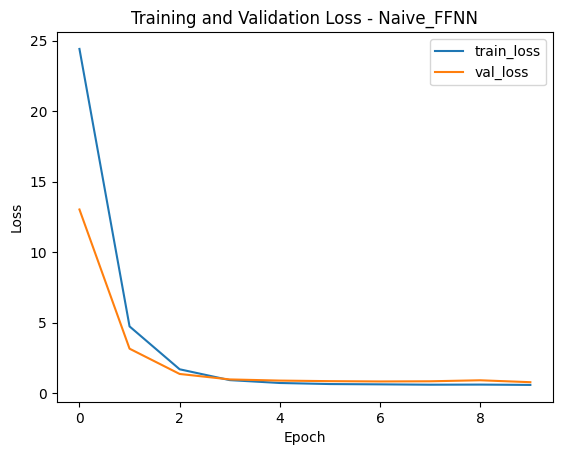

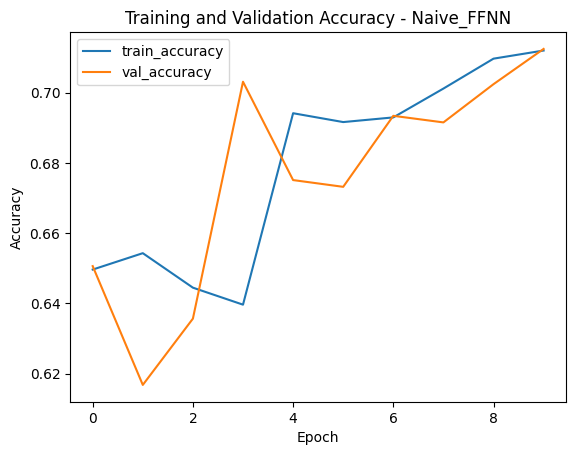

In [79]:
plot_model(model_name,naive_model.history) #plot model accuracy and loss

In [80]:
scores = naive_model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

3332/3332 [==============================] - 6s 2ms/step - loss: 0.7180 - accuracy: 0.7139
Accuracy: 71.39%


In [81]:
# Save model
save_model(model_name,naive_model)

Naive_FFNN has been saved


In [82]:
# load model 
new_model = tf.keras.models.load_model(model_name,compile=False)
new_model.summary()

Model: "Naive_FFNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               50250     
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 4.2 Beyond Baseline Model

In this natural language processing project, we aim to perform a sentiment analysis on the Tinder app reviews - determining whether the attitude of a given review is positive or negative, which is useful and efficient for assessing users' satisfaction in terms of brand monitoring, reputation management, customer service, and market research.

Moving beyond the baseline model, we have implemented several models on Tinder reviews dataset. Specifically, we have tried several models: (1) simple RNN, (2) Birectional LSTM, (3) pre-trained word embedding (GloVe) on Birectional GRU; (4) simple transformer, (5) BERT, (6) Roberta. They would act as baseline model, against which we will compare to improve final model.



<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### 4.2.1 Simple RNN

We implemented simple RNN model to address the limitations in the previous FFNN model. The reason why we chose RNN is because RNN introduces a concept of memory, carries forward the context history, and is able to handle sequential data such as language and time serie data. Unlike FFNN that does not maintain previous information, simple RNN utilizes the recurrent units that could capture the dependencies between words in the sentences. We expected the model would improve the performance.

- The embedding layer is responsible for converting the input sequences into a fixed-length vector representation that can be processed by the neural network of ~38000 dimension. It takes the number of words in the vocabulary, the embedding dimensionality (128 in this case), and the maximum input sequence length (maxlen=200) as input.
- Like naive FFNN, simple RNN used sigmoid activation function to map the output to a value between 0 and 1, which represents the predicted probability of the input belonging to the positive class.

The model uses Adam as optimizer, binary cross-entropy as loss function and accuracy as metric, and the model takes 1774 seconds to train.

The test accuracy is **78.34%**, and the test loss is **0.5624**.

In [83]:
# Free up memory
K.clear_session()

# build a Simple RNN model

#create model 
model_name = 'SimpleRNN'
simple_rnn_model = build_model(model_name,maxlen, n_words)
# compiles the Simple RNN model
simple_rnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
simplernn_history=simple_rnn_model.fit(dataset_train, epochs=5,
                  validation_data=dataset_val)

Epoch 1/5
2666/2666 [==============================] - 406s 151ms/step - loss: 0.2643 - accuracy: 0.8985 - val_loss: 0.4796 - val_accuracy: 0.7929
Epoch 2/5
2666/2666 [==============================] - 345s 129ms/step - loss: 0.2085 - accuracy: 0.9254 - val_loss: 0.5009 - val_accuracy: 0.7851
Epoch 3/5
2666/2666 [==============================] - 340s 127ms/step - loss: 0.2054 - accuracy: 0.9275 - val_loss: 0.5457 - val_accuracy: 0.7762
Epoch 4/5
2666/2666 [==============================] - 341s 128ms/step - loss: 0.1900 - accuracy: 0.9343 - val_loss: 0.5579 - val_accuracy: 0.7725
Epoch 5/5
2666/2666 [==============================] - 342s 128ms/step - loss: 0.1850 - accuracy: 0.9368 - val_loss: 0.5543 - val_accuracy: 0.7811


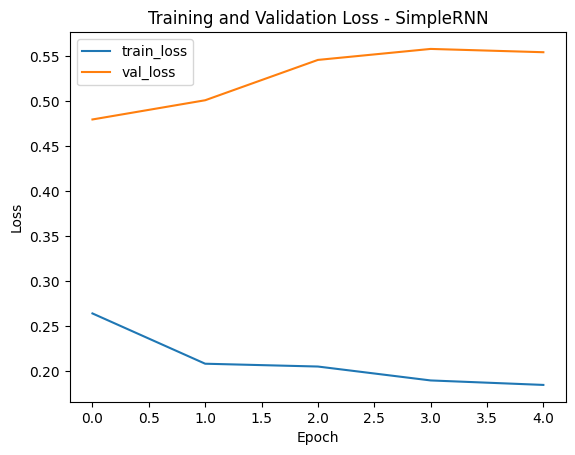

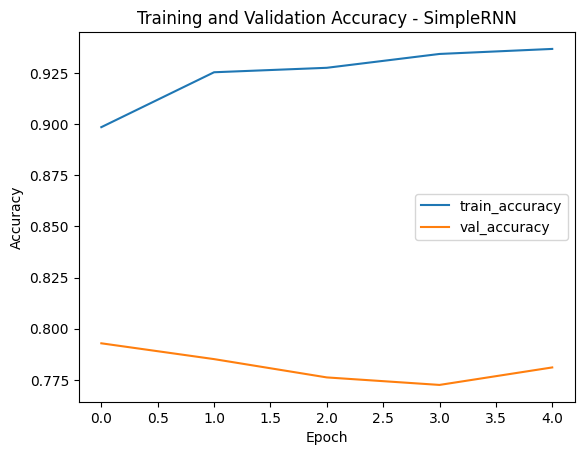

In [84]:
plot_model(model_name,simplernn_history)

In [85]:
scores = simple_rnn_model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

3332/3332 [==============================] - 58s 17ms/step - loss: 0.5624 - accuracy: 0.7834
Accuracy: 78.34%


In [86]:
# Save model
save_model(model_name,simple_rnn_model)

SimpleRNN has been saved


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### 4.2.2 Birectional LSTM

Though RNN improves the accuracy of our task and performs better than FFNN, it still has some limitations since it is unidirectional and its simple repeated structure suffers from vanishing gradients as we move farther away from the target. To solve these issues, we try a Birectional LSTM model in this section. We expect Bi-LSTM would have better performance than simple RNN because it can capture both the right and left directions of the context and has the ability to decide how much of the past information to be included. The update gate in Bidirectional LSTM also solves the vanishing gradients problem. 

- The embedding layer takes as input a sequence of integers of length maxlen representing the indices of the words in the vocabulary. It embeds the input sequence into a dense vector space of size 128.

- The LSTM layer consists of 128 LSTM units and uses a dropout of 0.2 to reduce overfitting. The recurrent_dropout parameter specifies the dropout rate for the recurrent connections of the LSTM units.

- Finally, a dense layer with a sigmoid activation function is added to the model to output a probability value between 0 and 1 indicating the sentiment of the input text.
    
The model uses Adam as optimizer, binary cross-entropy as loss function and accuracy as metric, and the model takes 318 seconds to train.

The test accuracy is **78.21%**, and the test loss is **0.5587**.

In [87]:
# Free up memory
K.clear_session()

# Bi-LSTM
model_name = 'BidirectionalLSTM'

maxlen = max([len(i) for i in X_train]) 
bilstm_model = build_model(model_name,maxlen, n_words)
bilstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [88]:
bilstm_history=bilstm_model.fit(dataset_train, epochs=3,
                  validation_data=dataset_val)

Epoch 1/3
2666/2666 [==============================] - 141s 50ms/step - loss: 0.2291 - accuracy: 0.9138 - val_loss: 0.4895 - val_accuracy: 0.7871
Epoch 2/3
2666/2666 [==============================] - 90s 34ms/step - loss: 0.1811 - accuracy: 0.9362 - val_loss: 0.5123 - val_accuracy: 0.7827
Epoch 3/3
2666/2666 [==============================] - 87s 33ms/step - loss: 0.1626 - accuracy: 0.9440 - val_loss: 0.5630 - val_accuracy: 0.7757


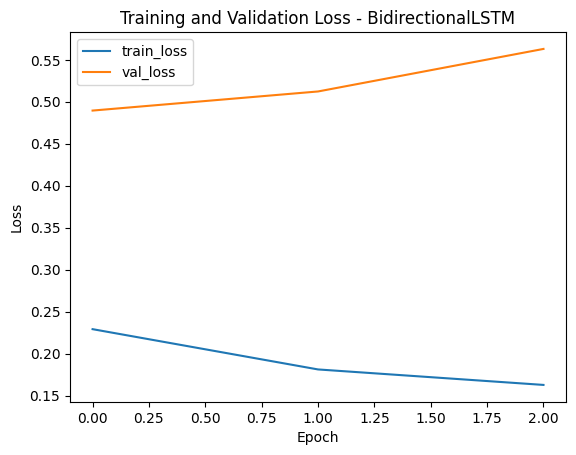

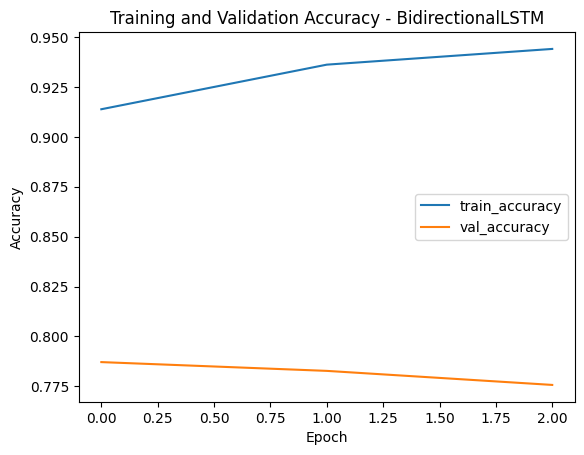

In [89]:
plot_model(model_name,bilstm_history)

In [90]:
scores = bilstm_model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

3332/3332 [==============================] - 38s 11ms/step - loss: 0.5587 - accuracy: 0.7821
Accuracy: 78.21%


In [91]:
# save model
save_model(model_name,bilstm_model)

BidirectionalLSTM has been saved


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### 4.2.3 Pre-trained Word Embedding with GloVe

Though the architecture of bidirectional LSTM seems to satisfy most of our requirements, its embedding layer still face certain limitations. In the previous bidirectional LSTM, we use the default one-hot encoding embedding layer from Tensorflow which cannot capture the similarities between words and their semantic meanings since it treats every word as independent from each other. To address this issue, we use a more advanced pre-trained embedding layer from GloVe (Global Vectors for Word Representation) to initialize the word embeddings in the birectional LSTM network in replacement of the original embedding layer [1]. Compared to one-hot encoding, GloVe encodes semantic relationships and preserves the linear relationship between words based on their co-occurrence statistics in a corpus and thus should improve the overall performance of the bidirectional LSTM model.


- To use pre-trained GLOVE embeddings on an Birectional LSTM network, we first need to download and load the pre-trained embeddings into the model. During training, the weights of the embedding layer are kept fixed, meaning that they are not updated during the backpropagation process. Only the weights of the other layers in the network are updated during training. 

- We expect a pre-word embedding matrix like GloVe would help improving the sentiment analysis. Becasue GloVe learns a vector representation for each word in a corpus based on the frequency of co-occurrence of the words in a larger text corpus compared with our dataset. 


The model uses Adam as optimizer, binary cross-entropy as loss function and accuracy as metric, and the model takes 259 seconds to train.

The test accuracy is **80.20%**, and the test loss is **0.4741**.

In [92]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-05-07 20:09:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-07 20:09:51--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-07 20:09:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [93]:
# Load the pre-trained embeddings
import tqdm 

# Load the pre-train word embedding index 
embeddings_index = {}
with open(r'/content/glove.6B.300d.txt', encoding='utf-8') as f:
    for line in tqdm.tqdm(f):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

400000it [00:23, 17263.60it/s]


In [94]:
df2 = pd.read_csv('transfer_emoji.csv')

SEED = 20 #set the random seed

# train-test set split by a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(df2['content_emoji'], df2['score'], test_size=0.2,random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=SEED)

# count the unique words in text data 
words = X_train.copy()
words = words.apply(lambda x: x.lower().split()) 
unique = set()
for item in words:
    for elem in item:
        if elem not in unique:
            unique.add(elem)
n_words = len(unique)


# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=n_words, split=' ') #tokenize
tokenizer.fit_on_texts(X_train.values) # tokenizer fit on X_train data
X_train = tokenizer.texts_to_sequences(X_train) # Get X_train 
tokenizer.fit_on_texts(X_val.values) # tokenizer fit on X_val data
X_val = tokenizer.texts_to_sequences(X_val) # Get X_val
# maxlen = max([len(x) for x in X_train]) # Get max length of sentences
maxlen=200
X_train=tf.keras.utils.pad_sequences(X_train, maxlen=maxlen) # pad sequences
X_val=tf.keras.utils.pad_sequences(X_val, maxlen=maxlen) # pad sequences

tokenizer.fit_on_texts(X_test.values)
X_test = tokenizer.texts_to_sequences(X_test) # Get X_test
X_test=tf.keras.utils.pad_sequences(X_test, maxlen=maxlen) # pad sequences

In [95]:
dataset_train = dataset_pipline(X_train,y_train) #train dataset
dataset_val = dataset_pipline(X_val,y_val) #train dataset
dataset_test = dataset_pipline(X_test,y_test) #test dataset

In [96]:
embedding_dim = 300
# num_words = 10000
num_words = n_words
maxlen = max([len(i) for i in X_train])

# Create a matrix of word embeddings for the words
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [97]:
# Free up memory
K.clear_session()

# Build LSTM model
model_pretrain = Sequential()
model_pretrain.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model_pretrain.add(Bidirectional(LSTM(128, return_sequences=True))) #bidirectional LSTM layer
model_pretrain.add(Bidirectional(LSTM(128))) #bidirectional LSTM layer
model_pretrain.add(Dense(1, activation='sigmoid'))

model_pretrain.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model_pretrain.fit(dataset_train, epochs=3,
                  validation_data=dataset_val)

Epoch 1/3
2666/2666 [==============================] - 91s 32ms/step - loss: 0.2765 - accuracy: 0.8889 - val_loss: 0.4868 - val_accuracy: 0.7833
Epoch 2/3
2666/2666 [==============================] - 84s 31ms/step - loss: 0.2275 - accuracy: 0.9134 - val_loss: 0.4673 - val_accuracy: 0.7921
Epoch 3/3
2666/2666 [==============================] - 84s 31ms/step - loss: 0.2043 - accuracy: 0.9244 - val_loss: 0.4930 - val_accuracy: 0.7983


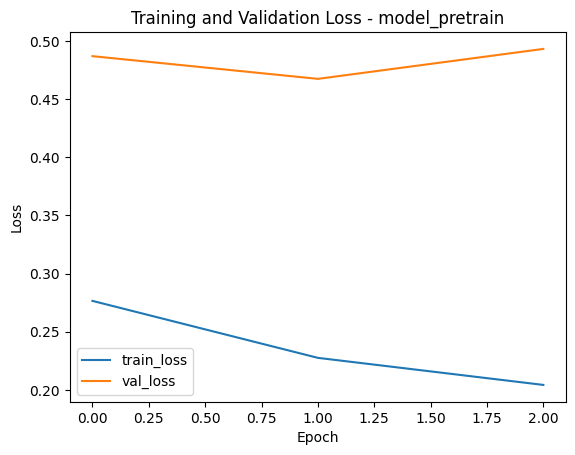

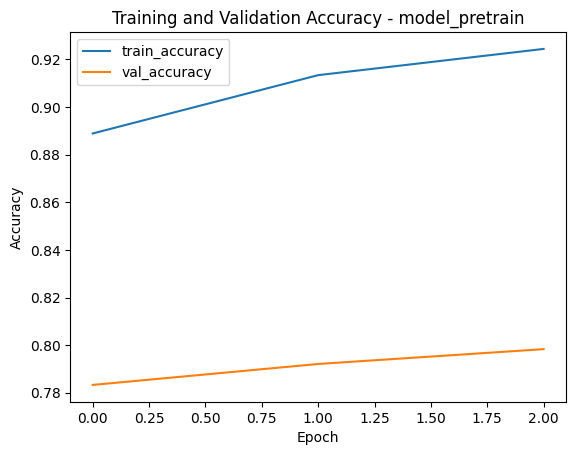

In [99]:
plot_model('model_pretrain', model_pretrain.history)

In [100]:
scores = model_pretrain.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

3332/3332 [==============================] - 39s 11ms/step - loss: 0.4741 - accuracy: 0.8020
Accuracy: 80.20%


In [101]:
#save model
model_name = 'BidirectionalLSTM-Pretrain'
save_model(model_name,model_pretrain)

BidirectionalLSTM-Pretrain has been saved


In [102]:
del embedding_matrix #delete memory 

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### 4.2.4 Transformer

The previous models including Simple RNN, Bidirectional LSTM, and Bidirectional LSTM with GloVe Embedding still suffer from limited modeling of long-term dependencies. The self-attention mechanism used in Transformer can capture global dependencies between all the tokens in the input sequence and  allow for parallel processing of inputs, which makes it much faster than LSTM for long sequences. Besides, it explicitly encodes the position of each token and thus learns the relationships between tokens more easily. Therefore, we applied the self-attention block that can focus on specific parts of the input sequence and assigns different weights or importance scores to different elements of the input sequence, allowing the model to pay attention to relevant information and disregard irrelevant or noisy parts.

The simple transformer model is composed of the following layers:

The simple transformer model is composed of the following layers: 
- Input layer: define the input shape of the model
- Embedding layer: transform input tokens into vectors
- Multi-head attention layer: compute the self-attention mechanism to capture the relationship between different positions of the input sequence
- Normalization layer: normalize the output of the multi-head attention layer
- Feed-forward layer: apply a dense layer with ReLU activation and dropout regularization to the output of the layer normalization
- Output layer: compute the output prediction of the model using the sigmoid function applied to the global average pooling of the feed-forward layer.

The model uses Adam as optimizer, binary cross-entropy as loss function and accuracy as metric, and the model takes 191 seconds to train.

The test accuracy is **77.30%**, and the test loss is **0.5708**.

In [103]:
# Define the transformer model
def build_transformer_model(max_len, vocab_size):
    # Define the input layer
    inputs = Input(shape=(max_len,))

    # Define the embedding layer
    embedding = Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len)(inputs)

    # Define the multi-head attention layer
    attention = MultiHeadAttention(num_heads=8, key_dim=64)(embedding, embedding)
    attention = LayerNormalization(epsilon=1e-6)(attention + embedding)

    # Define the feed-forward layer
    feed_forward = Dense(units=64, activation='relu')(attention)
    feed_forward = Dropout(0.2)(feed_forward)
    feed_forward = Dense(units=32, activation='relu')(feed_forward)
    feed_forward = Dropout(0.2)(feed_forward)

    # Define the output layer
    outputs = Dense(units=1, activation='sigmoid')(GlobalAveragePooling1D()(feed_forward))

    # Define the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [104]:
# Define the maximum sequence length and vocabulary size
# Free up memory
K.clear_session()

# max_len = 100
vocab_size = 5000

# Build the transformer model
trans_model = build_transformer_model(maxlen, vocab_size)
# Compile the model
trans_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trans_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 200, 64)      320000      ['input_1[0][0]']                
                                                                                                  
 multi_head_attention (MultiHea  (None, 200, 64)     132672      ['embedding[0][0]',              
 dAttention)                                                      'embedding[0][0]']              
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 200, 64)     0           ['multi_head_attention[0][0]'

In [105]:
# Train the model
transfomer_model = trans_model.fit(dataset_train, epochs=3, validation_data=dataset_val)
# Evaluate the model
scores = trans_model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3
2666/2666 [==============================] - 98s 35ms/step - loss: 0.2573 - accuracy: 0.8979 - val_loss: 0.4858 - val_accuracy: 0.7819
Epoch 2/3
2666/2666 [==============================] - 41s 15ms/step - loss: 0.2173 - accuracy: 0.9186 - val_loss: 0.5361 - val_accuracy: 0.7887
Epoch 3/3
3332/3332 [==============================] - 12s 3ms/step - loss: 0.5708 - accuracy: 0.7730
Accuracy: 77.30%


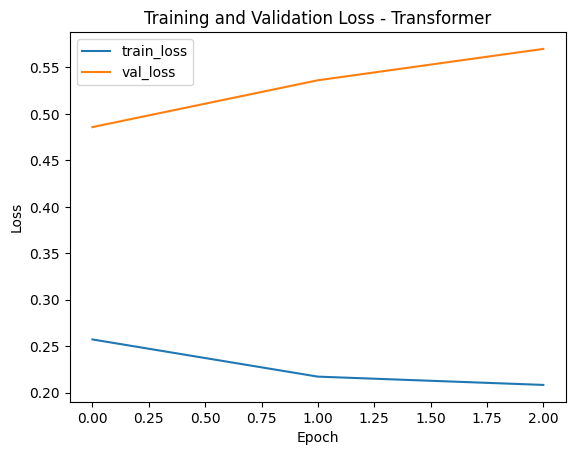

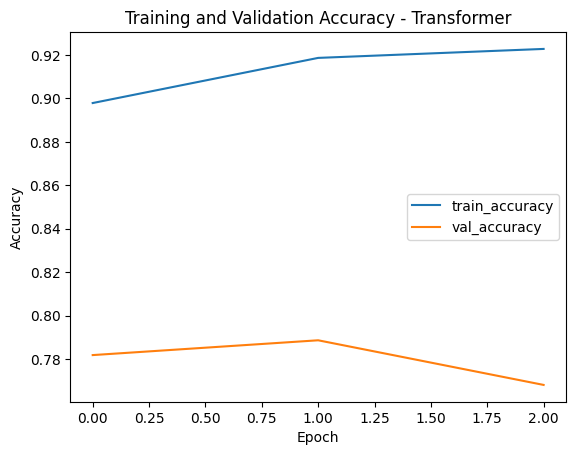

In [106]:
plt.plot(transfomer_model.history['loss'], label='train_loss') #plot training loss
plt.plot(transfomer_model.history['val_loss'], label='val_loss') #plot validation loss
plt.title(f'Training and Validation Loss - Transformer') #title
plt.xlabel('Epoch') #x axis label
plt.ylabel('Loss') #y axis label
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(transfomer_model.history['accuracy'], label='train_accuracy') #plot training accuracy
plt.plot(transfomer_model.history['val_accuracy'], label='val_accuracy') #plot validation accuracy 
plt.title(f'Training and Validation Accuracy - Transformer') #title
plt.xlabel('Epoch') #x axis label 
plt.ylabel('Accuracy') #y axis label
plt.legend()
plt.show()

In [107]:
# save model
model_name='Transformer'
save_model(model_name,trans_model)

Transformer has been saved


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### 4.2.5 BERT

After achieving xx% accuracy with our custom transformer model, we decided to extend our custom transformer model was to leverage the power of pre-trained models that have been trained on a large dataset encompassing all available text, allowing us to benefit from the knowledge transfer.

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained transformer model that uses bidirectional context for understanding natural language. Unlike traditional language models, which are trained to predict the next word in a sentence given the previous words, BERT learns to predict a word based on both its left and right context. This bidirectional approach allows BERT to capture more contextual information than unidirectional models, resulting in a better understanding of the relationships between words and their meanings.

The BERT model was pretrained using two pre-training objectives: Masked Language Model (MLM) and Next Sentence Prediction (NSP). MLM is designed to help the model learn bidirectional context by randomly masking a percentage of input tokens and training the model to predict the original tokens. NSP is used to train the model to understand the relationships between sentences by predicting if a given sentence logically follows the previous one.

Our BERT model is compiled with the binary_crossentropy loss function and the Adam optimizer with a learning rate of 1e-5.

The BERT model architecture consists of the following layers:

- BERT Base model: initialize the pre-trained BERT model with 12 transformer blocks and 768 hidden units in each block
- Input layer: define the shape of the model input and attention masking; consist of two inputs, input_ids and attention_masks: input_ids is a sequence of token IDs that represent the input text, and attention_masks is a binary mask that indicates which tokens should be attended to by the model
- Dropout layer: apply dropout regularization to the output of the BERT model to prevent overfitting. It randomly drops out a fraction of the input units during training
- Dense layer: apply a fully connected layer and a sigmoid activation function to the output of the dropout layer, indicating the sentiment of the input text

The model uses Adam as optimizer, sparse categorical cross-entropy with logits as loss function, which will output 0 and 1 as binary classification, and accuracy as metric. The model takes 8796 seconds to train and the batch size is 8.

The test accuracy is **93.92%**, and the test loss is **0.1808**.

In [108]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [109]:
SEED = 20 #set the random seed
model_name = 'BERT'
# Load df2 data
df = pd.read_csv(r"transfer_emoji.csv")

# Setup data
train_X, test_X, train_y, test_y = train_test_split(df['content_emoji'], df['score'], test_size=0.2,random_state=SEED)

In [110]:
# Tokenize
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
train_x_processed = tokenizer(train_X.tolist(), max_length=200, padding=True, truncation=True, return_tensors="tf")
validate_x_processed = tokenizer(test_X.tolist(), max_length=200, padding=True, truncation=True, return_tensors="tf")

In [111]:
# save training data and test data
import torch 
import numpy as np
torch.save(train_x_processed["input_ids"], 'bert_train_input_ids.pt')
torch.save(train_x_processed["attention_mask"], 'bert_train_attention_masks.pt')
torch.save(validate_x_processed["input_ids"], 'bert_test_input_ids.pt')
torch.save(validate_x_processed["attention_mask"], 'bert_test_attention_masks.pt')
np.save('bert_y_train', train_y)
np.save('bert_y_test', test_y)

In [112]:
import tensorflow as tf
import matplotlib.pyplot as plt 

In [113]:
# load training data and test data
bert_train_input_ids = torch.load('bert_train_input_ids.pt')
bert_train_attention_masks = torch.load('bert_train_attention_masks.pt')
bert_test_input_ids = torch.load('bert_test_input_ids.pt')
bert_test_attention_masks = torch.load('bert_test_attention_masks.pt')
bert_y_train = np.load('bert_y_train.npy')
bert_y_test = np.load('bert_y_test.npy')

In [114]:
from transformers import TFAutoModelForSequenceClassification

In [115]:
# load pre-trained bert base model
bert_model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [116]:
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Train BERT
batch_size = 8
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

bert_history = bert_model.fit([bert_train_input_ids, bert_train_attention_masks], bert_y_train, validation_split=0.2, epochs=3, batch_size=batch_size)

Epoch 1/3
42642/42642 [==============================] - 2994s 69ms/step - loss: 0.1968 - accuracy: 0.9299 - val_loss: 0.1844 - val_accuracy: 0.9348
Epoch 2/3
42642/42642 [==============================] - 2901s 68ms/step - loss: 0.1631 - accuracy: 0.9443 - val_loss: 0.1828 - val_accuracy: 0.9377
Epoch 3/3
42642/42642 [==============================] - 2901s 68ms/step - loss: 0.1413 - accuracy: 0.9537 - val_loss: 0.1821 - val_accuracy: 0.9377


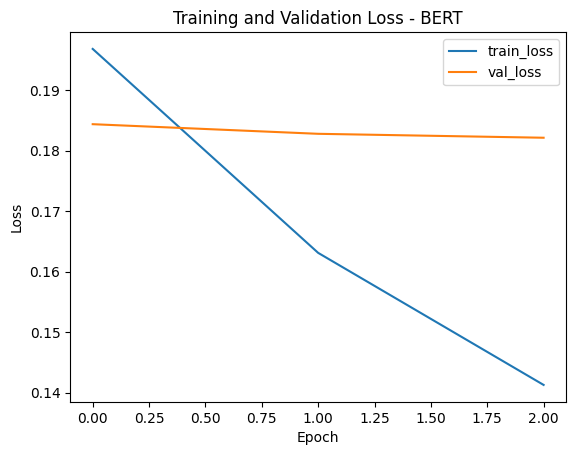

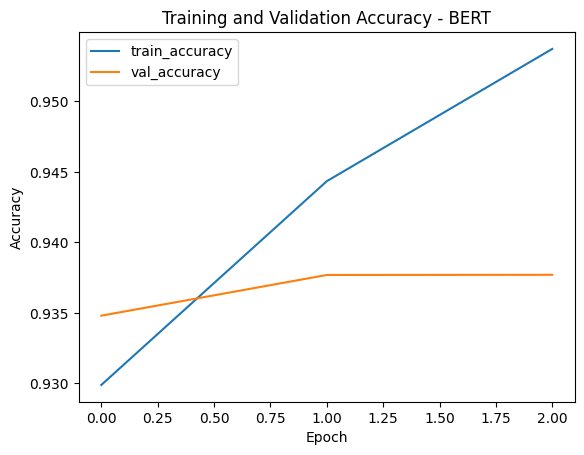

In [118]:
plt.plot(bert_history.history['loss'], label='train_loss') #plot training loss
plt.plot(bert_history.history['val_loss'], label='val_loss') #plot validation loss
plt.title(f'Training and Validation Loss - BERT') #title
plt.xlabel('Epoch') #x axis label
plt.ylabel('Loss') #y axis label
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(bert_history.history['accuracy'], label='train_accuracy') #plot training accuracy
plt.plot(bert_history.history['val_accuracy'], label='val_accuracy') #plot validation accuracy 
plt.title(f'Training and Validation Accuracy - BERT') #title
plt.xlabel('Epoch') #x axis label 
plt.ylabel('Accuracy') #y axis label
plt.legend()
plt.show()

In [119]:
bert_model.save(model_name)
np.save(model_name+"_history.npy",bert_history)
print(f"{model_name} has been saved and download")

BERT has been saved and download


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### 4.2.6 RoBerta

As a 209 group, we further investigated if there was room for improvements for our models and whether we could modify certain parts of these models to raise their performances. Therefore, we implemented RoBerta, short for robustly optimized BERT pretraining approach, which is beyond the course scope. RoBerta is introduced by Facebook scientists in 2019 and is built upon BERT with several modifications to address some limitations in the original model. It has the same architecture as BERT, but it adopts a novel and more advanced pre-training approach by changing the masked language modeling from static to dynamic. More specifically, RoBerta dynamically masks different tokens in each epoch whereas BERT masks the same tokens in each epoch. Dynamic masking reduces overfitting in the model by preventing the model from memorizing patterns in the training data. In addition, RoBerta also removes the Next Sentence Prediction objective from the original BERT model because NSP loss appears to be ineffective in the sense that it sometimes mixes both topic prediction and coherence prediction and leads the BERT to produce higher scores without learning coherence prediction, which could potentially hurt the overall performance. In our sentiment analysis task, NSP objective also appears to be unnecessary as well. Other than these modifications, RoBerta is trained with bigger batches over more data on longer sequences, which makes it more robust to various language task than BERT.

The RoBerta model is composed of the following layers: 
- RoBerta Base model: initialize the pre-trained RoBERTa model with 12 transformer blocks and 768 hidden units in each block
- Input layer: define the shape of the model input and attention masking; consist of two inputs, input_ids and attention_masks: input_ids is a sequence of token IDs that represent the input text, and attention_masks is a binary mask that indicates which tokens should be attended to by the model.
- Dense layer: apply a fully connected layer and a sigmoid activation function to the output of the dropout layer indicating the sentiment of the input text.

The model uses Adam as optimizer, binary cross-entropy as loss function and accuracy as metric. The model takes 9188 seconds to train and the batch size is 8.

The test accuracy is **94.13%**, and the test loss is **0.1751**.

In [120]:
df2 = pd.read_csv(r"transfer_emoji.csv")

In [121]:
!pip install transformers
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
# Load pre-trained roberta base model
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base", do_lower_case=True)

In [123]:
# train test split and data encoding
X_train, X_test, y_train, y_test = train_test_split(df2['content_emoji'].values, df2['score'].values, test_size=0.2,random_state=20)
token_lens = []

for txt in X_train:
    tokens = tokenizer_roberta.encode(txt, max_length=200, truncation=True)
    token_lens.append(len(tokens))
max_length=np.max(token_lens)

In [124]:
# function for roberta tokenization
def tok_rob(data, max_length) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            pad_to_max_length = True,
            return_attention_mask=True
        )
        input_ids.append(tf.convert_to_tensor(encoded['input_ids'][:max_length]))
        attention_masks.append(tf.convert_to_tensor(encoded['attention_mask'][:max_length]))
    return input_ids, attention_masks

In [125]:
# Data tokenization
train_input_ids, train_attention_masks = tok_rob(X_train, max_length)
test_input_ids, test_attention_masks = tok_rob(X_test, max_length)

In [126]:
# transform tokenized data to tensor
train_input_ids = tf.stack(train_input_ids)
train_attention_masks = tf.stack(train_attention_masks)
test_input_ids = tf.stack(test_input_ids)
test_attention_masks = tf.stack(test_attention_masks)

In [127]:
# save training data and test data
torch.save(train_input_ids, 'roberta_train_input_ids.pt')
torch.save(train_attention_masks, 'roberta_train_attention_masks.pt')
torch.save(test_input_ids, 'roberta_test_input_ids.pt')
torch.save(test_attention_masks, 'roberta_test_attention_masks.pt')

In [128]:
np.save('y_train_roberta', y_train)
np.save('y_test_roberta', y_test)

In [129]:
# load training data and test data
rob_train_input_ids = torch.load('roberta_train_input_ids.pt')
rob_train_attention_masks = torch.load('roberta_train_attention_masks.pt')
rob_test_input_ids = torch.load('roberta_test_input_ids.pt')
rob_test_attention_masks = torch.load('roberta_test_attention_masks.pt')
y_train_roberta = np.load('y_train_roberta.npy')
y_test_roberta = np.load('y_test_roberta.npy')

In [130]:
# build roberta model
model_name = 'ROBERTA'
roberta_model = TFRobertaModel.from_pretrained("roberta-base", num_labels=2)
input_ids = tf.keras.Input(shape=(200,),dtype='int32')
attention_masks = tf.keras.Input(shape=(200,),dtype='int32')
output = roberta_model([input_ids,attention_masks])
output = output[1]
#output = tf.keras.layers.Dropout(0.2)(output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(output)
#output = tf.keras.layers.Dropout(0.2)(output)
rob_model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
rob_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"])
rob_model.summary()

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_2[0][0]',                
 el)                            thPoolingAndCrossAt               'input_3[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 200,                                         

In [131]:
# train roberta model
history_2 = rob_model.fit([rob_train_input_ids,rob_train_attention_masks], y_train_roberta, validation_split=0.2, epochs=3, batch_size=8)

Epoch 1/3
42642/42642 [==============================] - 3157s 73ms/step - loss: 0.1959 - accuracy: 0.9305 - val_loss: 0.1831 - val_accuracy: 0.9396
Epoch 2/3
42642/42642 [==============================] - 3018s 71ms/step - loss: 0.1675 - accuracy: 0.9424 - val_loss: 0.1754 - val_accuracy: 0.9404
Epoch 3/3
42642/42642 [==============================] - 3013s 71ms/step - loss: 0.1510 - accuracy: 0.9493 - val_loss: 0.1742 - val_accuracy: 0.9403


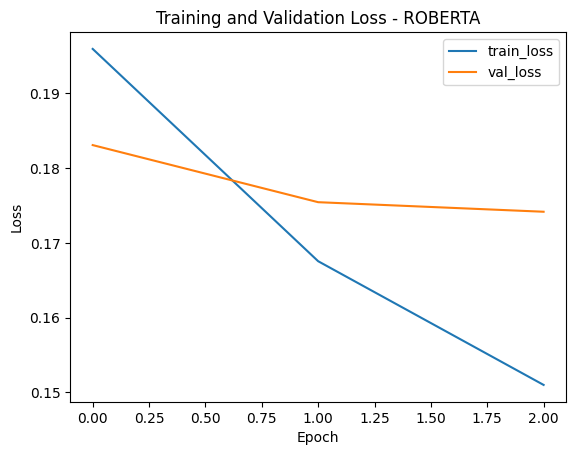

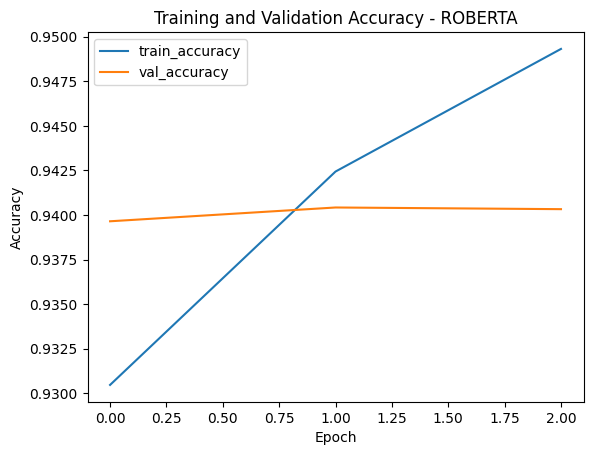

In [132]:
# Plot the training and validation loss

plt.plot(history_2.history['loss'], label='train_loss') #plot training loss
plt.plot(history_2.history['val_loss'], label='val_loss') #plot validation loss
plt.title(f'Training and Validation Loss - {model_name}') #title
plt.xlabel('Epoch') #x axis label
plt.ylabel('Loss') #y axis label
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history_2.history['accuracy'], label='train_accuracy') #plot training accuracy
plt.plot(history_2.history['val_accuracy'], label='val_accuracy') #plot validation accuracy 
plt.title(f'Training and Validation Accuracy - {model_name}') #title
plt.xlabel('Epoch') #x axis label 
plt.ylabel('Accuracy') #y axis label
plt.legend()
plt.show()

In [133]:
rob_model.save(model_name)
np.save(model_name+"_history.npy",history_2)
print(f"{model_name} has been saved and download")

ROBERTA has been saved and download


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## 4.3 Summary for Model Training and Evaluation

&nbsp; 
    
***Flow chart***
<img style="float: left; padding-right: 10px; width: 1000px" src="https://i.ibb.co/vdv2X3b/flowchart.png">

&nbsp;
    
### 4.3.1 Model Performance 

| Model | Train Accuracy | Train Loss | Test Accuracy | Test Loss| Training Time |
|----------|----------|----------|----------|----------|----------|
|   Naive FFNN           |   0.7120 |   0.5902 |   0.7139|   0.7180 | 95s|
|   Simple RNN           |   0.9368 |   0.1850 |   0.7834|   0.5624	| 1,774s|
|   Birectional LSTM     |   0.9440 |   0.1626 |  0.7821|   0.5587 | 318s|
|   Birectional LSTM -Pretrain on GloVe |   0.9244 |   0.2043 |   0.8020|   0.4741 | 259s|
|   Transformer          |   0.9228 |   0.2083 |   0.7730|   0.5708 | 191s|
|   BERT                 |   0.9537 |   0.1413 |   0.9392|   0.1808 | 8,796s|
|   Roberta              |   0.9493 |   0.1510 |   0.9413|   0.1751 | 9,188s|

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### 4.3.2 Result Interpretation

Among the 7 models we have implemented above, we found that the test accuracy of Roberta is the highest across models and its training accuracy is also high. Naive FFNN and Simple RNN have low training and test accuracy. Regarding the rest of models, their training accuracies are ~0.9 whereas the test accuracies declined to ~0.7, which indicates overfitting. The results make sense given that BERT and RoBERTa are transformer-based models capturing bidirectional contextual relationships and pre-trained on large amounts of text data. 

In the models we implemented above, we observed the following:

1. Naive FFNN - As anticipated, its performance was subpar due to its inability to capture complex relationships and contextual information in the text.

2. Simple RNN - While it excels at processing sequential data compared to FFNN, it struggles with long-range dependencies due to vanishing and exploding gradient problems.

3. Bidirectional LSTM - An advanced version of LSTM, it processes input sequences in both forward and backward directions, allowing for better contextual understanding and improved performance.

4. Bidirectional LSTM with Pre-trained embedding: A LSTM model pre-trained on a large dataset and fine-tuned for specific tasks, enhancing performance by learning general language representations.

5. Simple Transformer - Using self-attention mechanisms, this model excels at capturing long-range dependencies and context, outperforming LSTM and GRU models.

6. BERT (Bidirectional Encoder Representations from Transformers): A pre-trained transformer, BERT is adept at sentiment analysis tasks and was expected to excel in this specific task.

7. RoBERTa - A BERT variant that employs an alternate training methodology, RoBERTa boasts enhanced performance.



<div class="alert alert-success" style="color: #333; background-color: #e6efff; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 30px;">

<a id="part5"></a>
    
# 5) Conclusion

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

### Evaluate All Models on Test Set

In [134]:
#import f1 score and confusion matrix package 
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.utils import plot_model

In [135]:
# load test data
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [136]:
# Load saved fine-tuning models on test data
# Save the test accuracy, Loss, F1 score for each model
# Plot F1 score across classes, and confusion matrix
def test_accuarcy(model_name,X_test,y_test):
    print(f"Model Name: {model_name}")
    model_dict = {}
    # load model
    loaded_model = tf.keras.models.load_model(model_name,compile=True)
    print(loaded_model.summary())

    if model_name =='BERT':
        validation_data_bert = tf.data.experimental.load('bert_validation')
        bert_pred = loaded_model.predict(validation_data_bert)
        y_pred = np.argmax(bert_pred.logits, axis=1)
    else:
        # get loss and accuracy
        loss, accuracy= loaded_model.evaluate(X_test, y_test)
        y_prob = loaded_model.predict(X_test, verbose=0)
    y_pred = np.where(y_prob>0.5,1,0)
    f1_scores = f1_score(y_test.ravel(), y_pred.ravel(), average=None)

    model_dict["Name"] = model_name
    model_dict["Accuracy"] = accuracy
    model_dict["Loss"] = loss
    model_dict["f1"] = f1_scores

    print(f"Test Accuracy:{accuracy}")
    print(f"Model F1 score: {f1_scores}")

    # plot F1 score 
    plot_f1_score(model_name,f1_scores)

    # plot confusion matrix
    plot_confusion_matrix(model_name,y_test, y_pred, title='Confusion matrix')

    return model_dict


def plot_f1_score(model_name,f1_scores):
    labels = ["negative", "positive"]
    f1_scores_dict = {label: score for label, score in zip(labels, f1_scores)}

    plt.subplots(figsize=(8,5), dpi =100)
    plt.bar(list(f1_scores_dict.keys()), list(f1_scores_dict.values()))
    for i in range(2):
        plt.text(i, f1_scores[i]/3, 
              str(np.round(f1_scores[i], 4))+'\n',
              ha='center', va='bottom', color='white', weight='bold', fontsize = 18)
    plt.xlabel('Label')
    plt.ylabel('F1 Score')
    plt.title(f'F1 Score for Different Categories-{model_name}')
    plt.tight_layout()


def plot_confusion_matrix(model_name,y_label, y_pred, title='Confusion matrix'):
    labels = ["negative", "positive"]
    y_label = np.array(y_label).ravel()
    y_pred = np.array(y_pred).ravel()

    classes = np.unique(y_label)
    cm = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
            cm[i, j] = np.sum((y_pred == classes[i]) & (y_label == classes[j]))
    
    cm_percentage =  cm / np.sum(cm, axis=0)

    # Plot confusion matrix
    plt.figure(figsize=(7,7))
    plt.imshow(cm_percentage.T, cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ["predict-" + s[:1] for s in labels])
    plt.yticks(tick_marks, labels)
    plt.title(f"Confusion matrix-{model_name}")

    for i in range(len(classes)):
        for j in range(len(classes)):
            num_items = cm[i, j]
            pct_items = cm_percentage[i, j]
            plt.text(i, j,  f'{pct_items*100:.2f}% \n {num_items} ', ha="center", va="center", 
                     color="white" if  cm_percentage[i, j] > 0.6 else "black")
    plt.tight_layout()


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Naive FFNN

**Interpretation**: For our baseline model, a feed forward neural network, we have the following results:
- Test accuracy is **71.39%**;
- **F1 score for negative review class** is **~0.7428** while **F1 score for positive review class** is **~0.6777**; 
- In the **confusion matrix**, the model correctly predicts **60.96% (TP)** true positive out of all actual positive reviews; it correctly predicts **81.55% (TN)** true negative value out of all actual negative reviews. False negative is **39.04% (FN)**, which means that model incorrectly predicted the negative class in 39.04% of positive reviews. False positive is **18.45%(FP)**, which means that the model incorrectly predicted 18.45% negative reviews to positive reviews.

Overall, our baseline model has decent performance in predicting review sentiment. However, even though the number of negative reviews and positive reviews is quite balanced, the model is more likely to classify positive reviews to negative reviews as the F1 score for negative reviews is higher than positive review, and TN is higher than TP. FFNN provides us with a satisfactory foundation to build more accurate models.

Model Name: Naive_FFNN
Model: "Naive_FFNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               50250     
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 50,501
Trainable params: 50,501
Non-trainable params: 0
_________________________________________________________________
None
3332/3332 [==============================] - 6s 2ms/step - loss: 0.7180 - accuracy: 0.7139
Test Accuracy:0.7139225602149963
Model F1 score: [0.74282582 0.67769992]


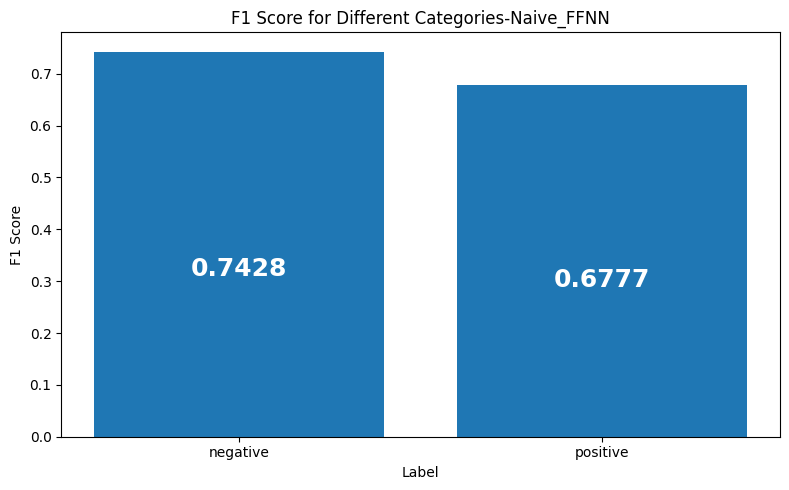

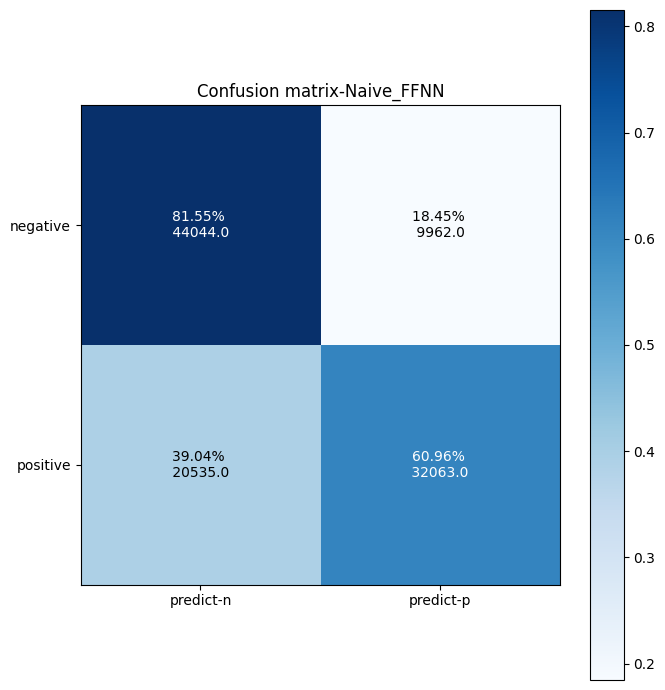

In [137]:
model_results=[]
ffnn_model_dict = test_accuarcy('Naive_FFNN',X_test,y_test)
model_results.append(ffnn_model_dict)

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Simple RNN

**Interpretation**: Moving beyond our baseline model, we have implemented a simple RNN model, we have the following results:
- Test accuracy is **78.34%**;
- **F1 score for negative review class** is **~0.7927** while **F1 score for positive review class** is **~0.7733**; 
- In the **confusion matrix**, the model correctly predicts **74.86% (TP)** true positive out of all actual positive reviews; it correctly predicts **81.74% (TN)** true negative value out of all actual negative reviews. False negative is **25.14% (FN)**, which means that model incorrectly predicted the negative class in 25.14% of positive reviews. False positive is **18.26%(FP)**, which means that the model incorrectly predicted 18.26% negative reviews to positive reviews.

Overall, the Simple RNN model has better performance than the FFNN model. It improves the test accuracy and has more accurate predictions in both positive and negative reviews. One potential explanation is that FFNN has shallower text understanding than recurrent models. In other words, the simple RNN would capture more context information because of the capability of processing sequential data.

Model Name: SimpleRNN
Model: "SimpleRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          4479872   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               22900     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 4,502,873
Trainable params: 4,502,873
Non-trainable params: 0
_________________________________________________________________
None
3332/3332 [==============================] - 61s 18ms/step - loss: 0.5624 - accuracy: 0.7834
Test Accuracy:0.783432126045227
Model F1 score: [0.79270559 0.77329013]


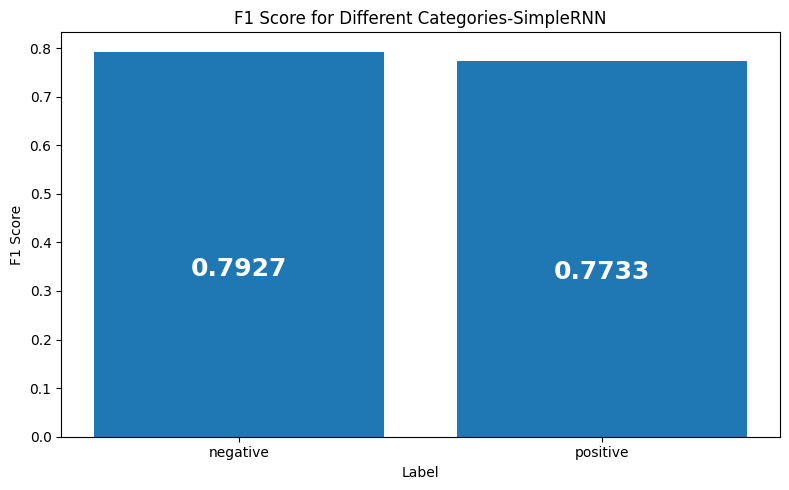

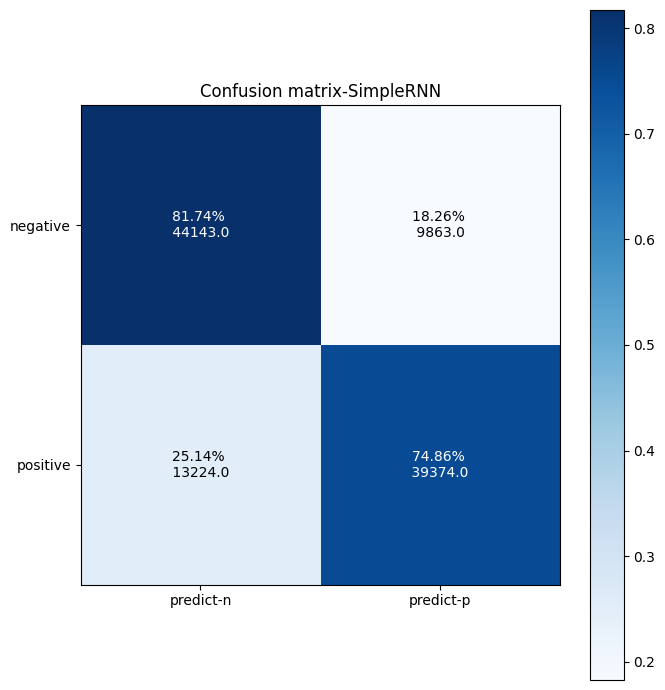

In [138]:
simplernn_model_dict = test_accuarcy('SimpleRNN',X_test,y_test)
model_results.append(simplernn_model_dict)

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Bidirectional LSTM

**Interpretation**: In this part, we have implemented a Bidirectional LSTM built from scratch, we have the following results:
- Test accuracy is **78.21%**;
- **F1 score for negative review class** is **~0.7859** while **F1 score for positive review class** is **~0.7782**; 
- In the **confusion matrix**, the model correctly predicts **77.46% (TP)** true positive out of all actual positive reviews; it correctly predicts **78.94% (TN)** true negative value out of all actual negative reviews. False negative is **22.54% (FN)**, which means that model incorrectly predicted the negative class in 22.54% of actual positive reviews. False positive is **21.06%(FP)**, which means that the model incorrectly predicted 21.06% actual negative reviews to positive reviews.

We anticipated that Bidirectional LSTMs would overcome the problem of vanishing gradient that Simple RNNs face and enable the capture of even more contextual information from both past and future inputs. As a result, we observed an improvement in performance compared to Simple RNNs. Specifically, the Bidirectional LSTM model achieved slightly higher test accuracy and made more accurate predictions on both positive and negative reviews.

Model Name: BidirectionalLSTM
Model: "BidirectionalLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          4479872   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 5,137,537
Trainable params: 5,137,537
Non-trainable params: 0
_________________________________________________________________
None
3332

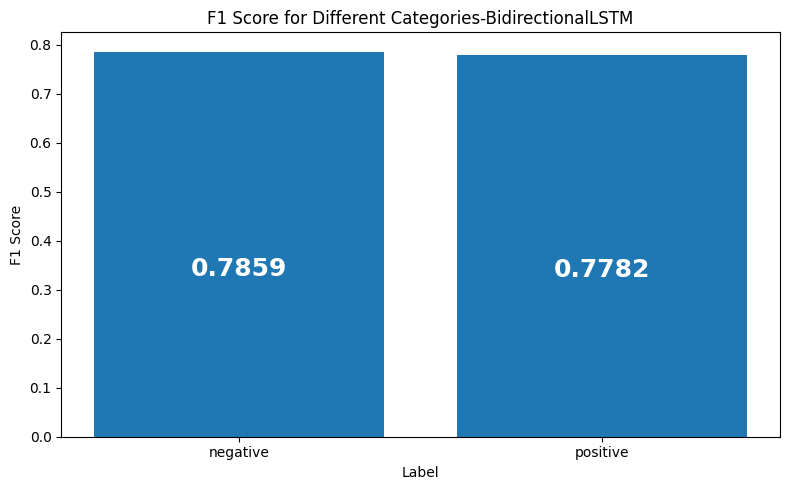

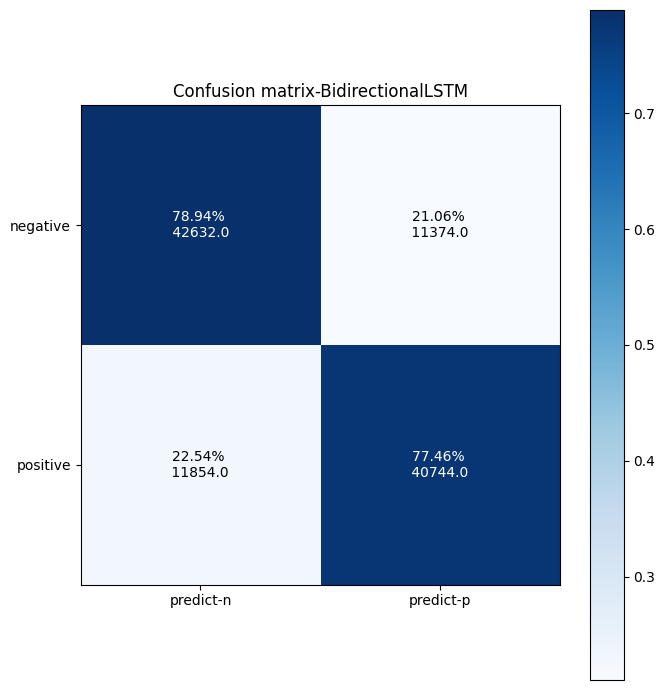

In [139]:
bi_lstm_model_dict = test_accuarcy('BidirectionalLSTM',X_test,y_test)
model_results.append(bi_lstm_model_dict)

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Pre-trained Word Embedding with GloVe

**Interpretation**: In this part, we have implemented a Bidirectional LSTM using a pre-trained word embedding model (GloVe), we have the following results:
- Test accuracy is **80.02%**;
- **F1 score for negative review class** is **~0.8128** while **F1 score for positive review class** is **~0.7898**; 
- In the **confusion matrix**, the model correctly predicts **75.40% (TP)** true positive out of all actual positive reviews; it correctly predicts **84.87% (TN)** true negative value out of all actual negative reviews. False negative is **24.60% (FN)**, which means that model incorrectly predicted the negative class in 24.60% of positive reviews. False positive is **15.13%(FP)**, which means that the model incorrectly predicted 15.13% negative reviews to positive reviews.

Overall, using a pre-existing embedding on Bi-LSTM model has significantly improved the performance compared with a naive Bi-LSTM model built from scratch. It improves the test accuracy and generates more accurate predictions in both positive and negative reviews. One potential explanation is that using a pre-existing word embedding has been trained on large amounts of data. For example, GloVe has been trained on large-scale Wikipedia data and Common Crawl dataset, which is much larger than our Tinder app review dataset. Therefore, the pre-trained embedding matrix could be generalizable to our small dataset, and helps better understand the semantic meanings.


However, the LSTM model does not capture contextual meaning of words, and their relationships to other words in a sentence. In the next part we decide to use a transformer-based model, such as Bert and RoBERTa.

Model Name: BidirectionalLSTM-Pretrain
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          41153100  
                                                                 
 bidirectional (Bidirectiona  (None, 200, 256)         439296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 41,986,893
Trainable params: 833,793
Non-trainable params: 41,153,100
_________________________________________________________________

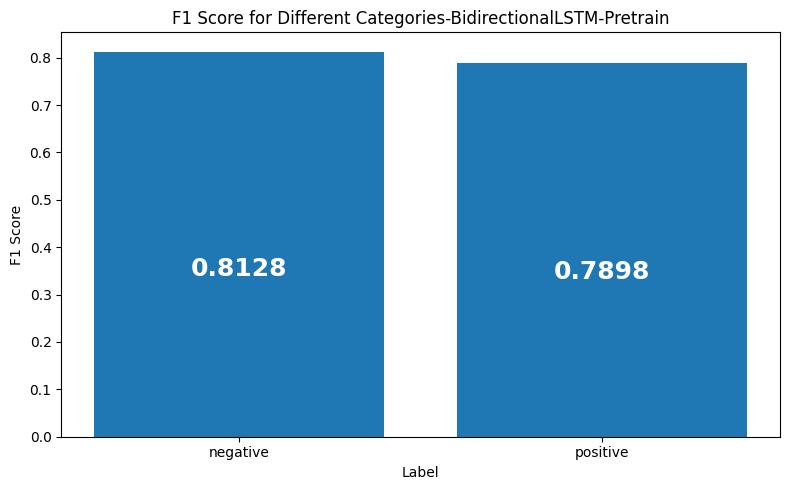

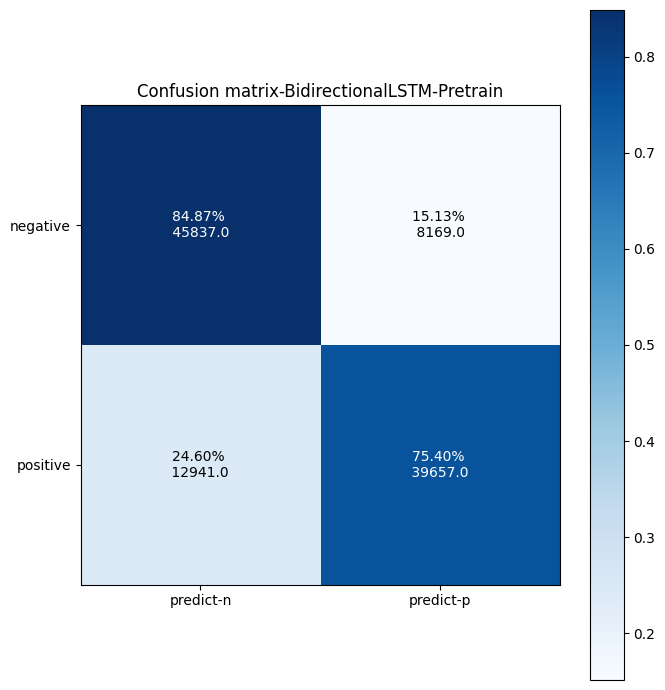

In [140]:
pre_bilsmt_model_dict = test_accuarcy('BidirectionalLSTM-Pretrain',X_test,y_test)
model_results.append(pre_bilsmt_model_dict)

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Transformer

**Interpretation**: In this part, we have implemented simple transformer, we have the following results:
- Test accuracy is **77.30%**;
- **F1 score for negative review class** is **~0.7907** while **F1 score for positive review class** is **~0.7519**; 
- In the **confusion matrix**, the model correctly predicts **69.73% (TP)** true positive out of all actual positive reviews; it correctly predicts **84.67% (TN)** true negative value out of all actual negative reviews. False negative is **30.27% (FN)**, which means that model incorrectly predicted the negative class in 30.27% of positive reviews. False positive is **15.33%(FP)**, which means that the model incorrectly predicted 15.33% negative reviews to positive reviews.

As expected, the performance of the transformer is better than LSTM as the transformer introduces a self-attention mechanism that enables the model to pay attention to relevant information and disregard irrelevant or noisy parts. However, the simple transformer built from scratch performs worse than LSTM with pre-trained word embeddings, highlighting the benefit of pre-trained embedding that captures important semantic and syntactic information about the words, as well as handle out-of-vocabulary words.

Model Name: Transformer
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 200, 64)      320000      ['input_1[0][0]']                
                                                                                                  
 multi_head_attention (MultiHea  (None, 200, 64)     132672      ['embedding[0][0]',              
 dAttention)                                                      'embedding[0][0]']              
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 200, 64)     0           ['mul

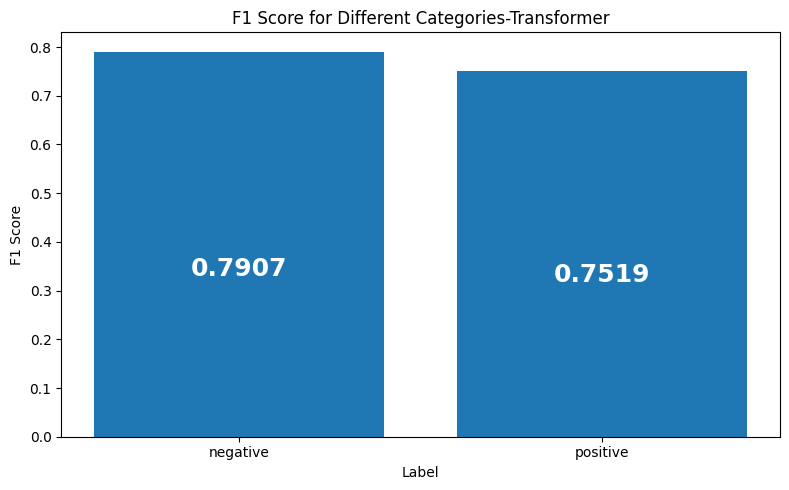

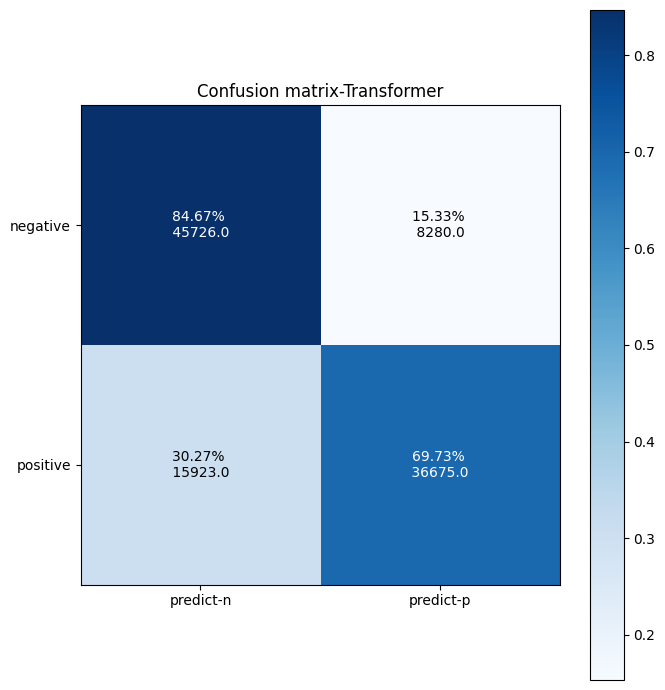

In [141]:
transformer_model_dict = test_accuarcy('Transformer',X_test,y_test)
model_results.append(transformer_model_dict)

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## BERT

**Interpretation**: In this part, we have implemented BERT, we have the following results:
- Test accuracy is **93.92%**;
- **F1 score for negative review class** is **~0.9406** while **F1 score for positive review class** is **~0.9378**; 
- In the **confusion matrix**, the model correctly predicts **92.80% (TP)** true positive out of all actual positive reviews; it correctly predicts **95.01% (TN)** true negative value out of all actual negative reviews. False negative is **7.20% (FN)**, which means that model incorrectly predicted the negative class in 7.20% of positive reviews. False positive is **4.99%(FP)**, which means that the model incorrectly predicted 4.99% negative reviews to positive reviews.

The BERT model has achieved a significant improvement in performance compared to the Bi-LSTM model using pre-trained word embeddings and the custom transformer model. The BERT model achieved a test accuracy of 93.92%, which is higher than the previous two models. It also achieved higher F1 scores for both positive and negative review classes, indicating a better balance between precision and recall in the model's predictions.

The BERT model outperformed the previous two model due to its ability to capture more contextual relationships between words in a sentence. BERT leverages a transformer-based architecture that processes the entire input sequence at once, enabling it to capture dependencies and relationships between all words in the sentence. This architecture allows the model to understand the broader context and meaning of the input text more effectively. 

Additionally, BERT has been pre-trained on a massive amount of data using unsupervised learning, allowing it to learn rich and generalizable representations of language. These pre-trained representations can be fine-tuned for specific tasks, resulting in more accurate predictions.

3332/3332 [==============================] - 192s 58ms/step - loss: 0.1808 - accuracy: 0.9392
Test Accuracy:0.9392236471176147
Model F1 score: [0.94061575 0.93776476]


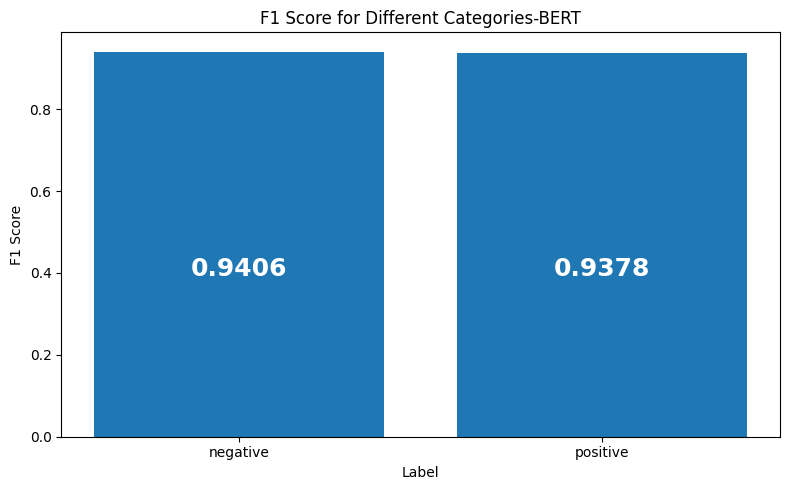

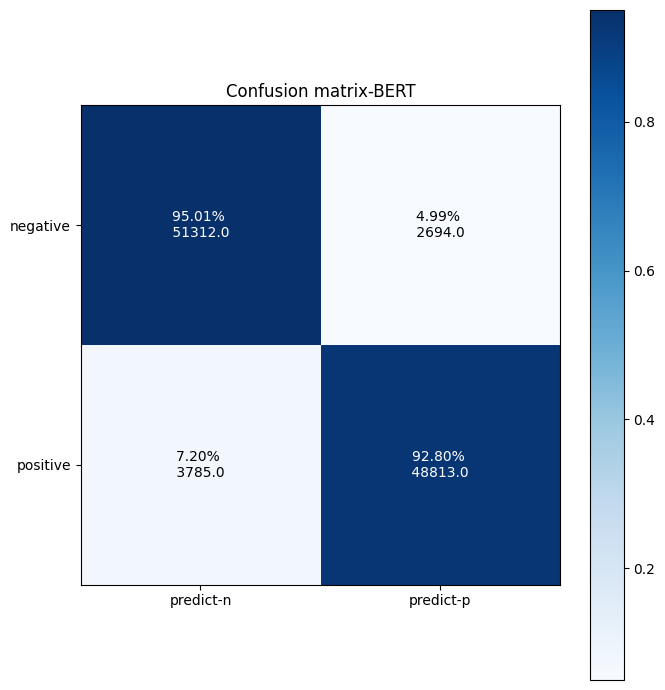

In [142]:
model_name = 'BERT'
bert_train_input_ids = torch.load('bert_train_input_ids.pt')
bert_train_attention_masks = torch.load('bert_train_attention_masks.pt')
bert_test_input_ids = torch.load('bert_test_input_ids.pt')
bert_test_attention_masks = torch.load('bert_test_attention_masks.pt')
bert_y_train = np.load('bert_y_train.npy')
bert_y_test = np.load('bert_y_test.npy')

bert_model_dict = {}
bert_result = bert_model.predict([bert_test_input_ids, bert_test_attention_masks])
y_pred = np.argmax(bert_result.logits, axis=1)
f1_scores = f1_score(bert_y_test.ravel(), y_pred.ravel(), average=None)

# get loss and accuracy
loss, accuracy= bert_model.evaluate([bert_test_input_ids, bert_test_attention_masks],bert_y_test)

bert_model_dict["Name"] = model_name
bert_model_dict["Accuracy"] = accuracy
bert_model_dict["Loss"] = loss
bert_model_dict["f1"] = f1_scores
model_results.append(bert_model_dict)

print(f"Test Accuracy:{accuracy}")
print(f"Model F1 score: {f1_scores}")

# plot F1 score 
plot_f1_score('BERT',f1_scores)

# plot confusion matrix
plot_confusion_matrix('BERT',bert_y_test, y_pred, title='Confusion matrix')


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">


## RoBERTa


**Interpretation**: In this part, we have implemented RoBERTa, we have the following results:
- Test accuracy is **94.13%**;
- **F1 score for negative review class** is **~0.9426** while **F1 score for positive review class** is **~0.9399**;
- In the **confusion matrix**, the model correctly predicts **93.11% (TP)** true positive out of all actual positive reviews; it correctly predicts **95.12% (TN)** true negative value out of all actual negative reviews. False negative is **6.89% (FN)**, which means that model incorrectly predicted the negative class in 6.89% of positive reviews. False positive is **4.88%(FP)**, which means that the model incorrectly predicted 4.88% negative reviews to positive reviews.
- Overall, we can see that RoBERTa performs better at predicting negative sentiments than positive ones. 

RoBERTa is able to slightly outperform BERT as its test accuracy increases by 0.21%, true negative ratio increases by 0.11%, and true positive ratio increases by 0.31%. It appears that RoBERTa shows major improvements in predicting positive sentiments correctly as compared to BERT. 
The reason why RoBERTa performs better than BERT may be because there is less overfitting in RoBERTa after dynamic masking is implemented and after the NSP loss is removed. This is also supported by evidence shown in the training process: though RoBERTa has better accuracy on test dataset, we observe that the training accuracy of BERT appears to be constantly higher than the training accuracy of RoBERTa after the first epoch during the training process, which indicates that BERT is in fact overfitting on the training dataset and may be memorizing certain patterns in the training corpus (especially in the positive reviews) that cannot be applied to the test corpus. 

3332/3332 [==============================] - 193s 58ms/step - loss: 0.1751 - accuracy: 0.9413
Test Accuracy:0.9412686228752136
Model F1 score: [0.94255911 0.93991882]


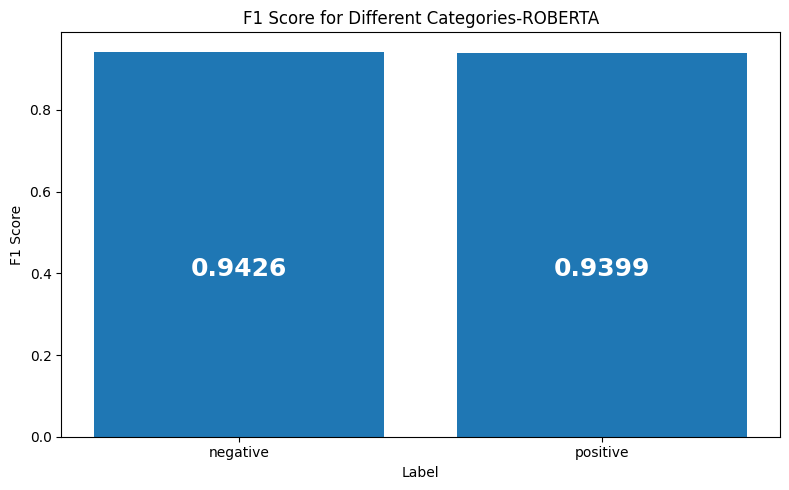

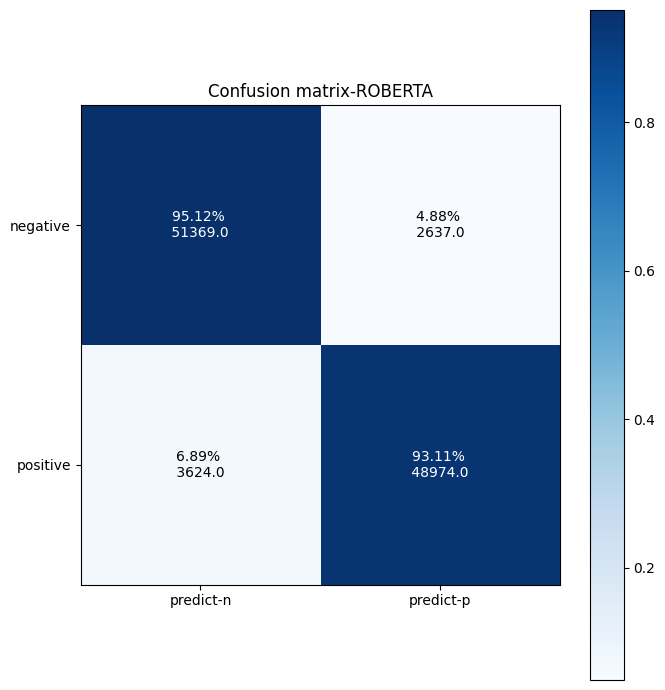

In [143]:
model_name = 'ROBERTA'
rob_model_dict = {}
rob_result = rob_model.predict([rob_test_input_ids, rob_test_attention_masks])
y_pred = np.where(rob_result>0.5,1,0)
f1_scores = f1_score(y_test_roberta.ravel(), y_pred.ravel(), average=None)

# get loss and accuracy
loss, accuracy= rob_model.evaluate([rob_test_input_ids, rob_test_attention_masks],y_test_roberta)

rob_model_dict["Name"] = model_name
rob_model_dict["Accuracy"] = accuracy
rob_model_dict["Loss"] = loss
rob_model_dict["f1"] = f1_scores
model_results.append(rob_model_dict)

print(f"Test Accuracy:{accuracy}")
print(f"Model F1 score: {f1_scores}")

# plot F1 score 
plot_f1_score('ROBERTA',f1_scores)

# plot confusion matrix
plot_confusion_matrix('ROBERTA',y_test_roberta, y_pred, title='Confusion matrix')


<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

## Conclusion

Here we present a dataframe with test accuracy, test loss and F1 score for 7 models. We conclude three patterns: 
- We could observe that **RoBERTa** has the highest test accuracy and **BERT** has similar performance with RoBERTa. The primary reason is that BERT and RoBERTa has similar architecture and trained on diverse courpus. 
- Another observable pattern is that after we apply the pre-trained the word embedding on model, the performance would significantly increase. In other words, **a pre-trained word embedding would help the model better understand semantic meanings**. 
- **Tranformer-based language models with pretrained base models have better performance than other models**. The reason is that tranformer-based language captures both context meanings and semantic meanings. In our domain-specific task, understanding the context could help the model better understand the human sentiments. Transfer learning with pre-trained models could take advantage of the pre-exisiting knowledge in large-scale corpus. Applying those models like BERT and RoBERTa on our smaller dataset task could lead to better performance in understanding contextual and semantic meanings.  

In [144]:
# Final Result of Our model
pd.DataFrame(model_results)

,Name,Accuracy,Loss,f1
0,Naive_FFNN,0.713923,0.717951,"[0.7428258211409539, 0.677699924965389]"
1,SimpleRNN,0.783432,0.562400,"[0.7927055929174935, 0.7732901261845141]"
2,BidirectionalLSTM,0.782109,0.558668,"[0.7859012646093722, 0.778180984758776]"
3,BidirectionalLSTM-Pretrain,0.801977,0.474126,"[0.8128280607178323, 0.7897912849518043]"
4,Transformer,0.772963,0.570817,"[0.7907310535644806, 0.7518989677406128]"
5,BERT,0.939224,0.180823,"[0.9406157484212165, 0.9377647567359877]"
6,ROBERTA,0.941269,0.175125,"[0.9425591060468446, 0.939918816992774]"


<div class="alert alert-success" style="color: #333; background-color: #e6efff; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 30px;">

<a id="part6"></a>
    
# 6) Strength, Limitation & Future work

<div class="alert alert-success" style="color: #333; background-color: #e6ffe6; border-color: #c3e6cb; border-width: 1px; border-radius: 3px; padding: 10px;">

This project has several **strengths**:
- First, we implemented a thorough data acquisition and preprocessing process that accounted for data missingness, imbalance, and irrelevant information in the text. This ensured that the data was well-suited for downstream tasks such as visualization and modeling. 
- Second, we conducted an extensive exploration of various NLP models by considering each model's advantages and disadvantages, improving the models in each step, and evaluating these models to find the one that performs the best. By incorporating advanced NLP models such as BERT and RoBERTa, we were able to take advantage of the latest techniques and achieve higher accuracy in sentiment analysis. 
- Third, we used a variety of metrics to evaluate the performance of our models, including accuracy, precision, recall, and F1 score, which provided a comprehensive understanding of their effectiveness.

However, there are also **limitations & future work**:
- First, non-English text posed a challenge for sentiment analysis. Non-English words can be identified by libraries such as SpaCy and TextBlob. In the current project, we removed non-English texts, which likely leads to information loss. **Future work** that utilizes non-English text can examine the option of  translating non-English texts to English using Seq2seq in machine translation before performing English-language sentiment analysis. 
- Second, sentiment analysis has limited interpretability. While our models are able to accurately predict sentiment, they did not provide insights into why a particular sentiment was expressed. Topic modeling and part-of-speech tagging has potential in **future work** to investigate why a specific sentiment is expressed. Topic modeling is a process of identifying hidden patterns or topics within a collection of documents. It can be used to identify the underlying themes or topics that are associated with a particular sentiment. 

<div class="alert alert-success" style="color: #333; background-color: #e6efff; border-color: #d8bfd8; border-width: 1px; border-radius: 3px; padding: 30px;">

<a id="part7"></a>
    
# References

[1] Pennington, J., Socher, R., & Manning, C. D. (2014, October). Glove: Global vectors for word representation. In Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP) (pp. 1532-1543).

[2] Dai, J., Yan, H., Sun, T., Liu, P., & Qiu, X. (2021). Does syntax matter? a strong baseline for aspect-based sentiment analysis with roberta. arXiv preprint arXiv:2104.04986.

[3] Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., ... & Stoyanov, V. (2019). Roberta: A robustly optimized bert pretraining approach. arXiv preprint arXiv:1907.11692.